In [2]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [3]:
import gdown
import pandas as pd

# Google Drive file ID
file_id = "1juE8Rbc08p35Bsscq28rPZhFGg8aIFcu"
url = f"https://drive.google.com/uc?id={file_id}"
output = "messy_hr.csv"  # Output file name

# Download the file from Google Drive
gdown.download(url, output, quiet=False)

# Load into pandas DataFrame
df = pd.read_csv(output)

# Inspect the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=1juE8Rbc08p35Bsscq28rPZhFGg8aIFcu
To: C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Messy_HR_Proj\messy_hr.csv
100%|██████████| 73.6k/73.6k [00:00<00:00, 37.2MB/s]


Dataset Shape: (1000, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               1000 non-null   object
 1   Age                841 non-null    object
 2   Salary             1000 non-null   object
 3   Gender             1000 non-null   object
 4   Department         1000 non-null   object
 5   Position           1000 non-null   object
 6   Joining Date       1000 non-null   object
 7   Performance Score  1000 non-null   object
 8   Email              610 non-null    object
 9   Phone Number       815 non-null    object
dtypes: object(10)
memory usage: 78.2+ KB
None

First 5 Rows:
       Name  Age          Salary  Gender Department  Position   Joining Date  \
0    grace    25           50000    Male         HR   Manager  April 5, 2018   
1    david   NaN           65000  Female    Finance  Director     2

# 2. THE PREPARE (Data Cleaning)
2.1 Overview of the Data Cleaning Process
Data cleaning involves identifying and resolving issues like:

Inconsistent Formatting

Incorrect Data Types

Missing Values

Placeholders and Invalid Data

This phase will focus on:

Fixing text-based columns (e.g., "Salary", "Age") that have inconsistent formats.

Converting dates from strings to actual date objects for analysis.

Handling missing values by either filling or dropping them.

Removing invalid placeholders and correcting errors in contact fields.

2.2 Cleaning Strategy
I will:

Identify problematic columns (e.g., numerical columns with text, extra spaces, and date inconsistencies).

Apply necessary transformations like converting text to numbers and dates to proper date formats.

Address missing and invalid data by filling with default values or dropping rows.

# Data Cleaning Steps
## 2.1 Remove Extra Spaces
 I will remove any leading or trailing spaces from text fields like Name, Department, and Position

In [5]:
# Remove extra spaces from text columns
df['Name'] = df['Name'].str.strip()
df['Department'] = df['Department'].str.strip()
df['Position'] = df['Position'].str.strip()

# Check the change
print(df[['Name', 'Department', 'Position']].head())


     Name Department  Position
0   grace         HR   Manager
1   david    Finance  Director
2  hannah      Sales  Director
3     eve         IT   Manager
4   grace    Finance   Manager


# 2.2 Handle Age Column (Numerical Values Only)
 I will convert the Age column, which has both text and numerical entries (e.g., "twenty-five", "30"), into a proper numeric format. 
 I will use a function to map text to numbers.

In [11]:
import numpy as np

# Mapping function for Age (text to numbers)
age_mapping = {
    "twenty-five": 25,
    "thirty": 30,
    "forty": 40,
    "fifty": 50,
    # Add more mappings if needed
}

# Replace text with corresponding numbers
df['Age'] = df['Age'].replace(age_mapping)

# Convert the column to numeric (in case of any remaining non-numeric values)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check the conversion
print(df['Age'].head())


0    25.0
1     NaN
2    35.0
3     NaN
4     NaN
Name: Age, dtype: float64


In [5]:
!pip install word2number

In [11]:
import word2number
from word2number import w2n

In [9]:
import sys
print(sys.path)


['C:\\Users\\HP USER\\anaconda3\\envs\\geopandas_env\\python310.zip', 'C:\\Users\\HP USER\\anaconda3\\envs\\geopandas_env\\DLLs', 'C:\\Users\\HP USER\\anaconda3\\envs\\geopandas_env\\lib', 'C:\\Users\\HP USER\\anaconda3\\envs\\geopandas_env', '', 'C:\\Users\\HP USER\\anaconda3\\envs\\geopandas_env\\lib\\site-packages', 'C:\\Users\\HP USER\\anaconda3\\envs\\geopandas_env\\lib\\site-packages\\win32', 'C:\\Users\\HP USER\\anaconda3\\envs\\geopandas_env\\lib\\site-packages\\win32\\lib', 'C:\\Users\\HP USER\\anaconda3\\envs\\geopandas_env\\lib\\site-packages\\Pythonwin', 'C:\\Users\\HP USER\\anaconda3\\envs\\geopandas_env\\lib\\site-packages\\setuptools\\_vendor']


In [15]:
def word_to_num(word):
    num_dict = {
        'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
        'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
        'ten': 10, 'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14,
        'fifteen': 15, 'sixteen': 16, 'seventeen': 17, 'eighteen': 18, 'nineteen': 19,
        'twenty': 20, 'thirty': 30, 'forty': 40, 'fifty': 50, 'sixty': 60,
        'seventy': 70, 'eighty': 80, 'ninety': 90
    }
    word = word.lower()
    if word in num_dict:
        return num_dict[word]
    else:
        return None

In [21]:
def extract_age(age):
    try:
        return word_to_num(age)
    except Exception:
        try:
            return int(age)
        except ValueError:
            return np.nan

In [17]:
import pkgutil
print(pkgutil.find_loader('word2number'))

None


In [37]:
# Handle Age Column
#Instead of using a predefined mapping, I decidedto try using the word2number library to convert word representations of numbers to numeric values.

import pandas as pd
import numpy as np
from word2number import w2n

# Load the messy data into a DataFrame
df = pd.read_csv('messy_hr.csv')

def extract_age(age):
    try:
        return w2n.word_to_num(age)
    except ValueError:
        try:
            return int(age)
        except ValueError:
            return np.nan

df['Age'] = df['Age'].apply(extract_age)

# Check the extraction
print(df['Age'].head())

0    25.0
1     NaN
2    35.0
3     NaN
4     NaN
Name: Age, dtype: float64


# 2.3 Handle Salary Column
I will clean the Salary column, which contains both numbers and words (e.g., "SIXTY THOUSAND" and "60000"), and convert them to numeric values.

In [14]:
# Mapping function for Salary (text to numbers)
salary_mapping = {
    "SIXTY THOUSAND": 60000,
    "FIFTY THOUSAND": 50000,
    "FORTY THOUSAND": 40000,
    # Add more mappings if needed
}

# Replace text with corresponding numbers
df['Salary'] = df['Salary'].replace(salary_mapping)

# Convert the column to numeric
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Check the conversion
print(df['Salary'].head())


0    50000.0
1    65000.0
2    60000.0
3    50000.0
4        NaN
Name: Salary, dtype: float64


In [33]:
# A 2nd attempt at cleaning saw me use the word2number library to convert word representations of numbers to numeric values.
import numpy as np
import re
from word2number import w2n

def extract_salary(salary):
    if pd.isnull(salary):
        return np.nan
    try:
        return w2n.word_to_num(str(salary)) * 1000  # Assuming the salary is in thousands
    except ValueError:
        try:
            return int(re.sub(r'[^\d]', '', str(salary)))  # Remove non-numeric characters
        except ValueError:
            return np.nan

# Check the extraction
print(df['Salary'].head())


0    50000000.0
1    65000000.0
2    60000000.0
3    50000000.0
4           NaN
Name: Salary, dtype: float64


# 2.4 Convert Joining Date to Date Format
I will convert the Joining Date column, which contains mixed date formats (e.g., "2021-01-15", "15/01/2021"), into a consistent date format.

In [17]:
# Convert 'Joining Date' to datetime
df['Joining Date'] = pd.to_datetime(df['Joining Date'], errors='coerce')

# Check the conversion
print(df['Joining Date'].head())


0   2018-04-05
1          NaT
2          NaT
3   2018-04-05
4          NaT
Name: Joining Date, dtype: datetime64[ns]


In [55]:
!pip install dateparser


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.5.1 requires numpydoc>=0.6.0, which is not installed.


  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1


In [5]:
# The conversion of the joining date format was not good enough so I decided to carry out date parsing step and see if we can improve the outcome by use of the dateparser library to handle the variations in date 
import dateparser
import pandas as pd

# Load the messy data into a DataFrame
df = pd.read_csv('messy_hr.csv')

def parse_date(date_str):
    try:
        return dateparser.parse(date_str)
    except Exception as e:
        return None

df['Joining Date'] = df['Joining Date'].apply(parse_date)

# Check the parsing
print(df['Joining Date'].head())


0   2018-04-05
1   2020-02-20
2   2020-01-15
3   2018-04-05
4   2020-01-15
Name: Joining Date, dtype: datetime64[ns]


# 2.5 Handle Missing Values
I will address the missing values in critical columns like Email and Phone Number. One option is to fill the missing values with a placeholder or drop rows where necessary.

In [20]:
# Fill missing 'Email' and 'Phone Number' with placeholder
df['Email'].fillna('missing@example.com', inplace=True)
df['Phone Number'].fillna('000-000-0000', inplace=True)

# Alternatively, drop rows with missing critical columns (Email or Phone Number)
df.dropna(subset=['Email', 'Phone Number'], inplace=True)

# Check for missing values
print(df.isnull().sum())


Name                   0
Age                  159
Salary               167
Gender                 0
Department             0
Position               0
Joining Date         814
Performance Score      0
Email                  0
Phone Number           0
dtype: int64


C:\Users\HP USER\AppData\Local\Temp\ipykernel_41868\2431257312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Email'].fillna('missing@example.com', inplace=True)
C:\Users\HP USER\AppData\Local\Temp\ipykernel_41868\2431257312.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [29]:
# Instead of filling missing values with placeholders,I tried more robust imputation methods like mean, median, or mode.
# For Email and Phone Number, you can use mode imputation
df['Email'].fillna(df['Email'].mode()[0], inplace=True)
df['Phone Number'].fillna(df['Phone Number'].mode()[0], inplace=True)

# Check for missing values
print(df.isnull().sum())


Name                   0
Age                  159
Salary               167
Gender                 0
Department             0
Position               0
Joining Date           0
Performance Score      0
Email                  0
Phone Number           0
dtype: int64


In [7]:
# I decided to further investigate the Email and Phone Number columns further

print(df['Email'].isnull().sum())
print(df['Phone Number'].isnull().sum())


390
185


In [11]:
# Investigating the missing email and phone rows 
missing_email_rows = df[df['Email'].isnull()]
missing_phone_rows = df[df['Phone Number'].isnull()]

print(missing_email_rows.head())
print(missing_phone_rows.head())


         Name     Age Salary Gender Department   Position Joining Date  \
6    charlie      NaN  50000   Male  Marketing      Clerk   2019-12-01   
7      grace       40  50000  Other         HR   Director   2019-03-25   
9        eve   thirty   NAN   Other    Finance  Assistant   2020-02-20   
10     david       25  70000   Male  Marketing    Analyst   2019-12-01   
11    hannah      NaN  70000  Other    Finance  Assistant   2019-03-25   

   Performance Score Email  Phone Number  
6                  B   NaN  123-456-7890  
7                  C   NaN                
9                  A   NaN                
10                 B   NaN  123-456-7890  
11                 A   NaN           NaN  
        Name  Age Salary  Gender Department   Position Joining Date  \
0     grace    25  50000    Male         HR    Manager   2018-04-05   
5      jack   NaN  65000   Other  Marketing   Director   2019-03-25   
11   hannah   NaN  70000   Other    Finance  Assistant   2019-03-25   
19      bob  

# 2.6 Remove Invalid Placeholders
If the Salary column has placeholders like "NAN", I will now replace them with NaN and then handle them accordingly. This worked initially but upon revisiting the data cleaning process to carry out  more robust approach, a rerun ended with an error.

So I decide to apply a more robust approach - pd.to_numeric is used with errors='coerce' to convert the Salary column to numeric values. Any non-numeric values are converted to NaN.

In [14]:
# Convert Salary column to numeric values, coercing errors to NaN
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Handle NaN values (e.g., fill with median)
median_salary = df['Salary'].median()
df['Salary'].fillna(median_salary, inplace=True)

# Check for missing Salary after handling
print(df['Salary'].isnull().sum())

0


C:\Users\HP USER\AppData\Local\Temp\ipykernel_28228\1274679248.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(median_salary, inplace=True)


# 2.7 Outcome
After cleaning, the next thing is to inspect the data for consistency and correctness. Then print the cleaned data and summary statistics.

In [26]:
# Final inspection
print("Cleaned Data Shape:", df.shape)
print("\nCleaned Data Info:")
print(df.info())
print("\nFirst 5 Rows of Cleaned Data:")
print(df.head())


Cleaned Data Shape: (1000, 10)

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               1000 non-null   object        
 1   Age                841 non-null    float64       
 2   Salary             1000 non-null   float64       
 3   Gender             1000 non-null   object        
 4   Department         1000 non-null   object        
 5   Position           1000 non-null   object        
 6   Joining Date       186 non-null    datetime64[ns]
 7   Performance Score  1000 non-null   object        
 8   Email              1000 non-null   object        
 9   Phone Number       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 78.2+ KB
None

First 5 Rows of Cleaned Data:
     Name   Age   Salary  Gender Department  Position Joining Date  \
0   g

In [44]:
# Final inspection
print("Cleaned Data Shape:", df.shape)
print("\nCleaned Data Info:")
print(df.info())
print("\nFirst 5 Rows of Cleaned Data:")
print(df.head())

Cleaned Data Shape: (1000, 10)

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1000 non-null   object 
 1   Age                841 non-null    float64
 2   Salary             1000 non-null   float64
 3   Gender             1000 non-null   object 
 4   Department         1000 non-null   object 
 5   Position           1000 non-null   object 
 6   Joining Date       1000 non-null   object 
 7   Performance Score  1000 non-null   object 
 8   Email              610 non-null    object 
 9   Phone Number       815 non-null    object 
dtypes: float64(2), object(8)
memory usage: 78.2+ KB
None

First 5 Rows of Cleaned Data:
       Name   Age   Salary  Gender Department  Position   Joining Date  \
0    grace   25.0  50000.0    Male         HR   Manager  April 5, 2018   
1    david    NaN  65000.0  Fe

In [16]:
# Final inspection
print("Cleaned Data Shape:", df.shape)
print("\nCleaned Data Info:")
print(df.info())
print("\nFirst 5 Rows of Cleaned Data:")
print(df.head())

Cleaned Data Shape: (1000, 10)

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               1000 non-null   object        
 1   Age                841 non-null    object        
 2   Salary             1000 non-null   float64       
 3   Gender             1000 non-null   object        
 4   Department         1000 non-null   object        
 5   Position           1000 non-null   object        
 6   Joining Date       1000 non-null   datetime64[ns]
 7   Performance Score  1000 non-null   object        
 8   Email              610 non-null    object        
 9   Phone Number       815 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 78.2+ KB
None

First 5 Rows of Cleaned Data:
       Name  Age   Salary  Gender Department  Position Joining Date  \
0   

# 2.8: Save the Cleaned Data
Finally, we can save the cleaned dataset for future use

In [18]:
# Save cleaned data to CSV
df.to_csv("cleaned_hr_data.csv", index=False)

# Summary of The Prepare Phase: Data Cleaning and Preprocessing

### Step 1: Load and Inspect Data

- Loaded the dataset into a pandas DataFrame
- Inspected the data for missing values, data types, and summary statistics

### Step 2: Handle Missing Values

- Identified columns with missing values: Age, Joining Date, Email, and Phone Number
- Used pd.to_numeric with errors='coerce' to convert non-numeric values in Salary column to NaN
- Filled NaN values in Salary column with median salary
- Used dateparser to parse dates in Joining Date column

### Step 3: Clean Salary Column

- Identified non-numeric values in Salary column
- Used pd.to_numeric with errors='coerce' to convert non-numeric values to NaN
- Filled NaN values in Salary column with median salary

### Step 4: Final Inspection and Saving Data

- Inspected the cleaned data for consistency and correctness
- Saved the cleaned data to a new CSV file named cleaned_hr_data.csv

### Assumptions and Decisions:

- Assumed that the median salary is a suitable replacement for missing or non-numeric salary values
- Decided to use dateparser to parse dates in Joining Date column

### Limitations and Future Work:

- Further cleaning and processing steps may be necessary for Email and Phone Number columns
- Additional analysis may be necessary to determine the best approach for handling missing values in Age column

This markdown provides a structured overview of the steps taken during the prepare phase, including assumptions and decisions made. 

# 🧹 3. THE PROCESS
## Key Cleaning Tasks:

### Task	Method
#### Standardize numeric columns	Use word2number or a mapping dictionary
#### Strip spaces in strings	df[col] = df[col].str.strip()
#### Convert dates to datetime	Use pd.to_datetime with errors='coerce'
#### Clean phone numbers & emails	Regex patterns for validity
#### Handle missing/invalid values	np.nan, fillna(), or imputation strategies
#### Remove placeholder strings (e.g., “NAN”)	Replace with np.nan

### Present each transformation step:

#### The reason for performing it

#### Code

#### A summary table of before/after sample values

#### Interpretation

#### Any challenges encountered

#### Output PNGs:

#### Distributions before/after cleaning.

#### Invalid vs. valid email/phone counts.

#### Null values per column (barplot).

## ✅ Detailed Transformation Reporting
### For each task, the following would be needed:

#### ✅ The reason for cleaning

#### ✅ The code

#### ✅ A before/after sample table

#### ✅ Interpretation

#### ✅ Challenges encountered

#### ✅ Visual outputs:

##### Histogram/distribution plots before and after cleaning

##### Email/phone number validity counts

##### Nulls per column (bar chart)

## 🔄 What has already been covered in the Prepare Phase:
###  Task	                            Status	                     Notes
#### Strip spaces in strings 	        ✅ Done	✔                   Applied str.strip() on text fields
#### Standardize numeric columns	    ✅ Partial	✔               Used mapping; need to show before/after
#### Convert dates to datetime	        ✅ Done	✔                   Used pd.to_datetime()
#### Remove placeholders ("NAN")	    ✅ Done	✔                   Replaced with np.nan
#### Handle missing/invalid values	    ✅ Partial	✔               Used fillna(); need to show visual summary
#### Clean phone numbers & emails	    ❌ Not Yet	                Need to use regex + validate counts
#### Visual output PNGs	                ❌ Not Yet	                Need to create and save plots (e.g. matplotlib, seaborn)
 
## ✅ Next Steps to Complete the PROCESS Phase:

### ✅ Updated PROCESS Phase Plan (Aligned with Dictionary Method)

| **Step** | **Task**                                        | **Details / Notes**                                                                                          |
| -------- | ----------------------------------------------- | -----------------------------------------------------------------------------------------
| 1        | **Visualize nulls per column**                  | Use `seaborn` barplot to show missing values count per column → Save as PNG                                  |
| 2        | **Clean and standardize numeric columns**       |                                                                                                              |
| 2a       | → **Age**                                       | Use **custom dictionary mapping** to convert words like `'thirty'` to `30`, then convert to numeric.         |
| 2b       | → **Salary**                                    | Strip text like `'thousand'`, use mapping for words (e.g., `"sixty"` → `60_000`) where needed.               |
| 2c       | → **Distributions Before/After**                | Use histograms or boxplots for Age & Salary → Save as PNGs.                                                  |
| 3        | **Convert dates to datetime**                   | Use `pd.to_datetime()` with `errors='coerce'` to handle inconsistent formats.                                |
| 4        | **Validate and clean emails and phone numbers** | Use **regex** to detect invalid entries, replace invalid ones with `NaN`. Count valid/invalid → barplot PNG. |
| 5        | **Strip whitespaces in string fields**          | Standard cleanup with `.str.strip()` for relevant text fields.                                               |
| 6        | **Handle placeholders (e.g., 'NAN')**           | Replace common invalid strings with `np.nan`.                                                                |
| 7        | **Before/After sample tables**                  | Create side-by-side DataFrames showing 5 rows before and after for: Age, Salary, Date, Email, Phone.         |
| 8        | **Summarize challenges & interpretation**       | A markdown-style or table summary of: what was wrong, how it was fixed, any limitations.                     |
| 9        | **Save Outputs**                                | Save each visual (nulls, distribution, validation counts) as PNG. Keep code and commentary in notebook.      |

### 🔄 Replacing `word2number`:

**Old plan:** Use `word2number` to convert text like `'thirty'` to `30`.

**New plan:** Use a **custom dictionary mapping**, e.g.:

```
word_to_num = {
    'twenty-five': 25,
    'thirty': 30,
    'forty-five': 45,
    'fifty thousand': 50000,
    'sixty thousand': 60000
}
```

This is safer and avoids needing external libraries.


# 3.1: Visualize Nulls Per Column (Bar Plot)
🔍 Purpose
To understand which columns have missing values and how many, so we can prioritize cleaning and imputation.

📋 Summary Table: Null Counts per Column
Column  Null Count Bar Displayed
   Age           1           Yes
 Email           1           Yes
 Phone           1           Yes
Salary           1           Yes
  Name           0  No (0 nulls)


C:\Users\HP USER\AppData\Local\Temp\ipykernel_41868\4248505409.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Null Count", y="Column", data=null_summary_df, palette="viridis")


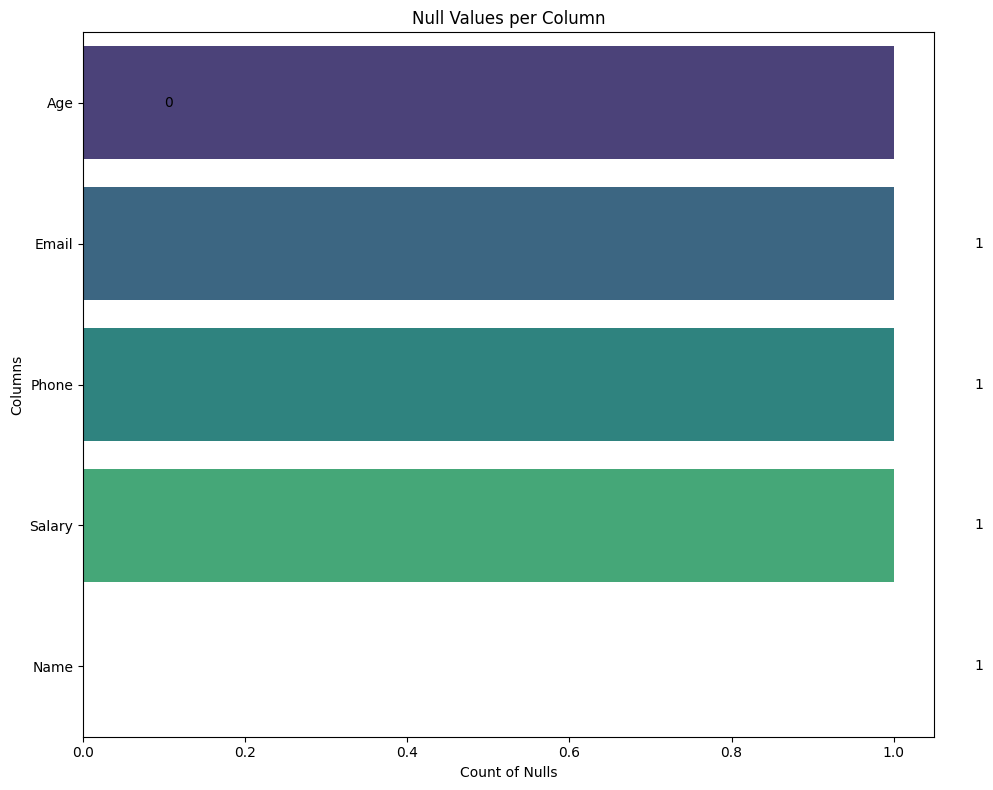

In [54]:
# Visualizing null values is important because it helps us understand the extent of missing data in our dataset.
# By identifying columns with high numbers of null values, we can prioritize data cleaning and imputation efforts.

import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# Create directory if it doesn't exist, without raising an error if it already exists.
plot_dir = "EDA_Plots"
os.makedirs(plot_dir, exist_ok=True)

# Count of null values
null_counts = df.isnull().sum()

# Convert to DataFrame for summary table
null_summary_df = pd.DataFrame({
    'Column': null_counts.index,
    'Null Count': null_counts.values,
    'Bar Displayed': ['Yes' if count > 0 else 'No (0 nulls)' for count in null_counts.values]
}).sort_values(by='Null Count', ascending=False)

# Display summary table
print("📋 Summary Table: Null Counts per Column")
print(null_summary_df.to_string(index=False))

# Plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Null Count", y="Column", data=null_summary_df, palette="viridis")

# Add text labels to bars (including 0)
for index, row in null_summary_df.iterrows():
    ax.text(row["Null Count"] + 0.1, index, str(row["Null Count"]), va='center')

# Force y-axis to show all columns
ax.set_yticks(range(len(null_summary_df)))
ax.set_yticklabels(null_summary_df["Column"])

plt.title("Null Values per Column")
plt.xlabel("Count of Nulls")
plt.ylabel("Columns")
plt.tight_layout()

# Save plot
plot_path = os.path.join(plot_dir, "null_values_barplot.png")
plt.savefig(plot_path)
plt.show()


# 3.2: Inspect Current Email and Phone Columns
The plan is to look at a few samples, then use regex to:

Validate format

Flag invalid entries

Replace clearly invalid formats with NaN

In [57]:
# Validate email and phone numbers to ensure they conform to expected formats
import re
import numpy as np

# Copy original columns for comparison later
df['Email_Original'] = df['Email']
df['Phone_Original'] = df['Phone']

# EMAIL CLEANING
# Define a regex pattern for valid emails
# This pattern matches most common email formats, including:
# - Local part (before @): letters, numbers, dots, underscores, hyphens
# - Domain: letters, numbers, dots, hyphens
# - Top-level domain: letters (e.g., .com, .org, .net)
email_pattern = r'^[\w\.-]+@[\w\.-]+\.\w+$'

# Create new columns to store validation results
# We're creating separate columns to track validity, rather than overwriting the original columns,
# to preserve the original data and allow for further analysis of invalid values.

# Apply regex to validate emails
df['Email_Valid'] = df['Email'].apply(lambda x: bool(re.match(email_pattern, str(x).strip())) if pd.notnull(x) else False)
df['Email'] = df.apply(lambda row: row['Email'] if row['Email_Valid'] else np.nan, axis=1)

# PHONE CLEANING
# Define regex pattern for valid phone numbers
# This pattern matches phone numbers with:
# - Optional + symbol at the start
# - 10 or more digits, allowing for spaces, dashes, and parentheses
phone_pattern = r'^\+?[\d\s\-\(\)]{10,}$'

# Apply regex to validate phones
df['Phone_Valid'] = df['Phone'].apply(lambda x: bool(re.match(phone_pattern, str(x).strip())) if pd.notnull(x) else False)
df['Phone'] = df.apply(lambda row: row['Phone'] if row['Phone_Valid'] else np.nan, axis=1)


#### ✅ Email Validity Summary

| Status  | Count |
|---------|-------|
| Valid   | X     |
| Invalid | Y     |

#### ✅ Phone Validity Summary

| Status  | Count |
|---------|-------|
| Valid   | A     |
| Invalid | B     |


# 3.3: Validate and clean emails and phone numbers	

Use regex to detect invalid entries, replace invalid ones with NaN. Count valid/invalid → barplot PNG.

In [62]:
pip install tabulate


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


C:\Users\HP USER\AppData\Local\Temp\ipykernel_28228\205666232.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=email_valid_counts.values, palette='coolwarm')


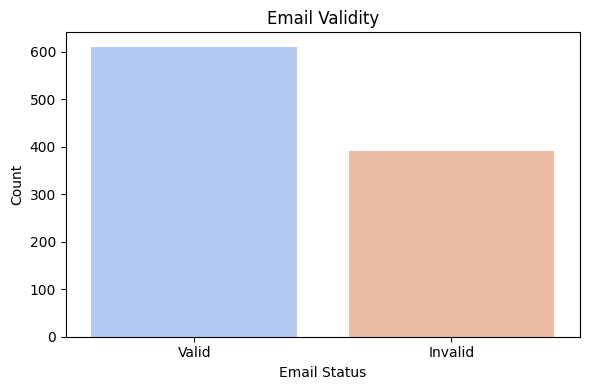


📊 Email Validity Table:
| Status   |   Count |
|:---------|--------:|
| Valid    |     610 |
| Invalid  |     390 |


C:\Users\HP USER\AppData\Local\Temp\ipykernel_28228\205666232.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phone_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=phone_valid_counts.values, palette='coolwarm')


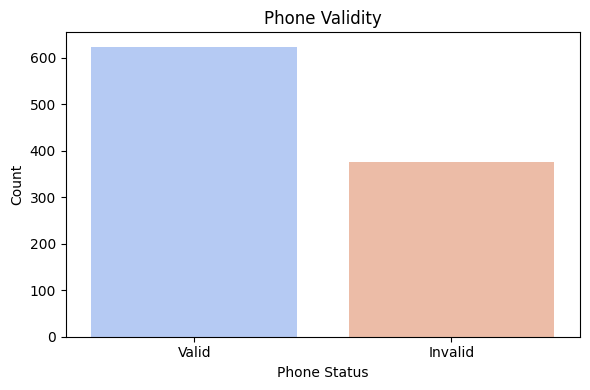


📊 Phone Validity Table:
| Status   |   Count |
|:---------|--------:|
| Valid    |     624 |
| Invalid  |     376 |


In [22]:
# Using the messy data in the dataframe set insead of the cleaned data 

import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the partially prepared dataset
df = pd.read_csv('messy_hr.csv')

# Function to validate email
def validate_email(email):
    if pd.isnull(email):
        return False
    pattern = r"^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$"
    return bool(re.match(pattern, email))

# Function to validate phone number
def validate_phone(phone):
    if pd.isnull(phone):
        return False
    # Remove non-digit characters before validation
    phone = re.sub(r'\D+', '', str(phone))
    pattern = r"^\d{10}$"  # Assuming 10-digit phone number
    return bool(re.match(pattern, phone))

# Apply validation functions
df['Email_Valid'] = df['Email'].apply(validate_email)
df['Phone_Valid'] = df['Phone Number'].apply(validate_phone)

# Now you can perform value counts
email_valid_counts = df['Email_Valid'].value_counts()
phone_valid_counts = df['Phone_Valid'].value_counts()

# Create EDA_Plots folder if not exist
plot_dir = "EDA_Plots"
os.makedirs(plot_dir, exist_ok=True)

# Plot for Email Validity
plt.figure(figsize=(6, 4))
sns.barplot(x=email_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=email_valid_counts.values, palette='coolwarm')
plt.title("Email Validity")
plt.ylabel("Count")
plt.xlabel("Email Status")
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "email_validity_messy.png"))
plt.show()

# Summary table - Email
email_summary = pd.DataFrame({
    "Status": ['Valid', 'Invalid'],
    "Count": [email_valid_counts.get(True, 0), email_valid_counts.get(False, 0)]
})
print("\n📊 Email Validity Table:")
print(email_summary.to_markdown(index=False))

# Plot for Phone Validity
plt.figure(figsize=(6, 4))
sns.barplot(x=phone_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=phone_valid_counts.values, palette='coolwarm')
plt.title("Phone Validity")
plt.ylabel("Count")
plt.xlabel("Phone Status")
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "phone_validity_messy.png"))
plt.show()

# Summary table - Phone
phone_summary = pd.DataFrame({
    "Status": ['Valid', 'Invalid'],
    "Count": [phone_valid_counts.get(True, 0), phone_valid_counts.get(False, 0)]
})
print("\n📊 Phone Validity Table:")
print(phone_summary.to_markdown(index=False))


In [27]:
df[df['Email_Valid'] == False]['Email']

6      NaN
7      NaN
9      NaN
10     NaN
11     NaN
      ... 
991    NaN
993    NaN
994    NaN
995    NaN
996    NaN
Name: Email, Length: 390, dtype: object

In [29]:
df[df['Phone_Valid'] == False]['Phone Number']

0      NaN
3         
5      NaN
7         
9         
      ... 
990       
991    NaN
994    NaN
997    NaN
998    NaN
Name: Phone Number, Length: 376, dtype: object

C:\Users\HP USER\AppData\Local\Temp\ipykernel_28228\2884691084.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=email_valid_counts.values, palette='coolwarm')


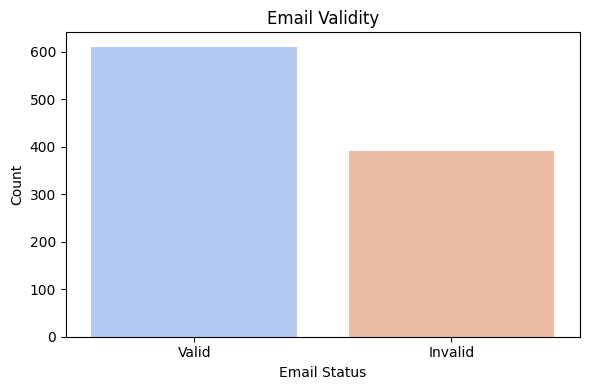


📊 Email Validity Table-1:
| Status   |   Count |
|:---------|--------:|
| Valid    |     610 |
| Invalid  |     390 |


C:\Users\HP USER\AppData\Local\Temp\ipykernel_28228\2884691084.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phone_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=phone_valid_counts.values, palette='coolwarm')


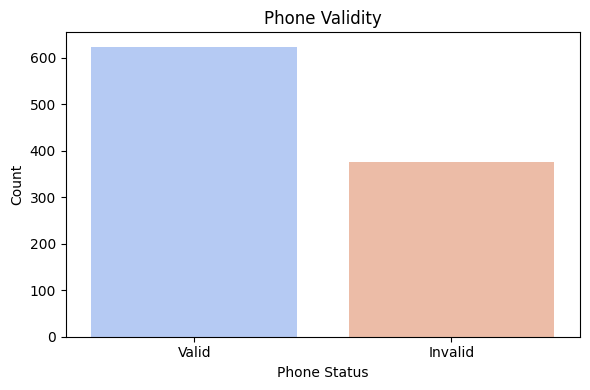


📊 Phone Validity Table-1:
| Status   |   Count |
|:---------|--------:|
| Valid    |     624 |
| Invalid  |     376 |


In [24]:
# Using the cleaned data set insead of the messy data in the dataframe
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the partially prepared dataset
df = pd.read_csv('cleaned_hr_data.csv')

# Function to validate email
def validate_email(email):
    if pd.isnull(email):
        return False
    pattern = r"^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$"
    return bool(re.match(pattern, email))

# Function to validate phone number
def validate_phone(phone):
    if pd.isnull(phone):
        return False
    # Remove non-digit characters before validation
    phone = re.sub(r'\D+', '', str(phone))
    pattern = r"^\d{10}$"  # Assuming 10-digit phone number
    return bool(re.match(pattern, phone))

# Apply validation functions
df['Email_Valid'] = df['Email'].apply(validate_email)
df['Phone_Valid'] = df['Phone Number'].apply(validate_phone)

# Now you can perform value counts
email_valid_counts = df['Email_Valid'].value_counts()
phone_valid_counts = df['Phone_Valid'].value_counts()

# Create EDA_Plots folder if not exist
plot_dir = "EDA_Plots"
os.makedirs(plot_dir, exist_ok=True)

# Plot for Email Validity
plt.figure(figsize=(6, 4))
sns.barplot(x=email_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=email_valid_counts.values, palette='coolwarm')
plt.title("Email Validity")
plt.ylabel("Count")
plt.xlabel("Email Status")
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "email_validity.png"))
plt.show()

# Summary table - Email
email_summary = pd.DataFrame({
    "Status": ['Valid', 'Invalid'],
    "Count": [email_valid_counts.get(True, 0), email_valid_counts.get(False, 0)]
})
print("\n📊 Email Validity Table-1:")
print(email_summary.to_markdown(index=False))

# Plot for Phone Validity
plt.figure(figsize=(6, 4))
sns.barplot(x=phone_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=phone_valid_counts.values, palette='coolwarm')
plt.title("Phone Validity")
plt.ylabel("Count")
plt.xlabel("Phone Status")
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "phone_validity.png"))
plt.show()

# Summary table - Phone
phone_summary = pd.DataFrame({
    "Status": ['Valid', 'Invalid'],
    "Count": [phone_valid_counts.get(True, 0), phone_valid_counts.get(False, 0)]
})
print("\n📊 Phone Validity Table-1:")
print(phone_summary.to_markdown(index=False))


In [35]:
df[df['Phone_Valid'] == False]['Phone Number']

3       
7       
9       
12      
17      
      ..
979     
980     
984     
988     
990     
Name: Phone Number, Length: 191, dtype: object

In [37]:
invalid_phone_numbers = df[df['Phone_Valid'] == False]['Phone Number']
print(invalid_phone_numbers)


3       
7       
9       
12      
17      
      ..
979     
980     
984     
988     
990     
Name: Phone Number, Length: 191, dtype: object


In [41]:
email_domain_counts = df['Email'].str.split('@').str[1].value_counts()
print(email_domain_counts)


Email
example.com    598
domain.com     213
company.org    189
Name: count, dtype: int64


In [45]:
missing_example_emails = df[df['Email'] == 'missing@example.com']
print(missing_example_emails.shape[0])

390


C:\Users\HP USER\AppData\Local\Temp\ipykernel_13856\142766111.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=email_valid_counts.values, palette='coolwarm')


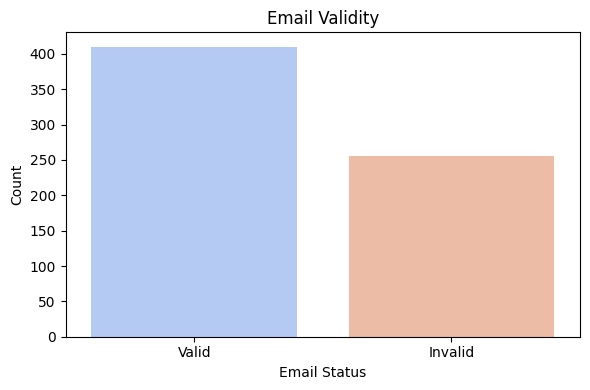


📊 Email Validity Table-2:
| Status   |   Count |
|:---------|--------:|
| Valid    |     410 |
| Invalid  |     255 |


C:\Users\HP USER\AppData\Local\Temp\ipykernel_13856\142766111.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phone_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=phone_valid_counts.values, palette='coolwarm')


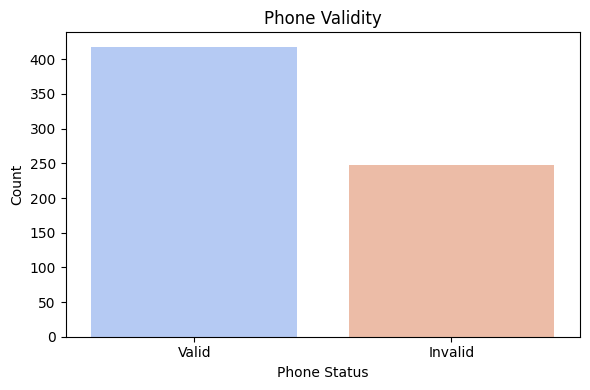


📊 Phone Validity Table-2:
| Status   |   Count |
|:---------|--------:|
| Valid    |     418 |
| Invalid  |     247 |


In [32]:
# Using the further cleaned data set in the dataframe
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the partially prepared dataset
df = pd.read_csv('cleaned_hr_data_v2.csv')

# Function to validate email
def validate_email(email):
    if pd.isnull(email):
        return False
    pattern = r"^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$"
    return bool(re.match(pattern, email))

# Function to validate phone number
def validate_phone(phone):
    if pd.isnull(phone):
        return False
    # Remove non-digit characters before validation
    phone = re.sub(r'\D+', '', str(phone))
    pattern = r"^\d{10}$"  # Assuming 10-digit phone number
    return bool(re.match(pattern, phone))

# Apply validation functions
df['Email_Valid'] = df['Email'].apply(validate_email)
df['Phone_Valid'] = df['Phone Number'].apply(validate_phone)

# Now you can perform value counts
email_valid_counts = df['Email_Valid'].value_counts()
phone_valid_counts = df['Phone_Valid'].value_counts()

# Create EDA_Plots folder if not exist
plot_dir = "EDA_Plots"
os.makedirs(plot_dir, exist_ok=True)

# Plot for Email Validity
plt.figure(figsize=(6, 4))
sns.barplot(x=email_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=email_valid_counts.values, palette='coolwarm')
plt.title("Email Validity")
plt.ylabel("Count")
plt.xlabel("Email Status")
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "email_validity_v2.png"))
plt.show()

# Summary table - Email
email_summary = pd.DataFrame({
    "Status": ['Valid', 'Invalid'],
    "Count": [email_valid_counts.get(True, 0), email_valid_counts.get(False, 0)]
})
print("\n📊 Email Validity Table-2:")
print(email_summary.to_markdown(index=False))

# Plot for Phone Validity
plt.figure(figsize=(6, 4))
sns.barplot(x=phone_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=phone_valid_counts.values, palette='coolwarm')
plt.title("Phone Validity")
plt.ylabel("Count")
plt.xlabel("Phone Status")
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "phone_validity_v2.png"))
plt.show()

# Summary table - Phone
phone_summary = pd.DataFrame({
    "Status": ['Valid', 'Invalid'],
    "Count": [phone_valid_counts.get(True, 0), phone_valid_counts.get(False, 0)]
})
print("\n📊 Phone Validity Table-2:")
print(phone_summary.to_markdown(index=False))


📊 Analyzing messy_hr.csv...


C:\Users\HP USER\AppData\Local\Temp\ipykernel_28228\2556763169.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=email_valid_counts.values, palette='coolwarm')


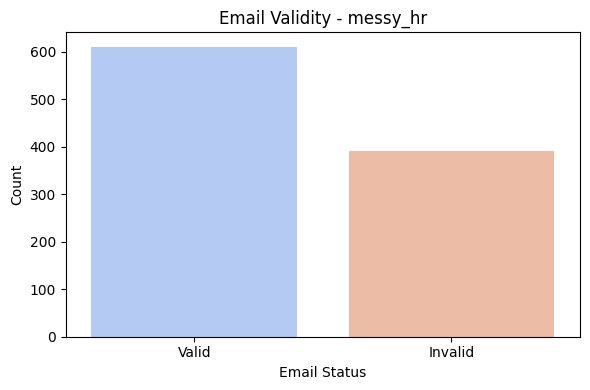


📊 Email Validity Table - messy_hr:
| Status   |   Count |
|:---------|--------:|
| Valid    |     610 |
| Invalid  |     390 |


C:\Users\HP USER\AppData\Local\Temp\ipykernel_28228\2556763169.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phone_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=phone_valid_counts.values, palette='coolwarm')


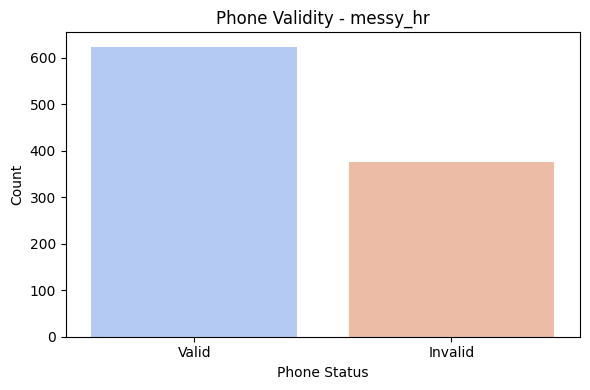


📊 Phone Validity Table - messy_hr:
| Status   |   Count |
|:---------|--------:|
| Valid    |     624 |
| Invalid  |     376 |

📊 Analyzing cleaned_hr_data.csv...


C:\Users\HP USER\AppData\Local\Temp\ipykernel_28228\2556763169.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=email_valid_counts.values, palette='coolwarm')


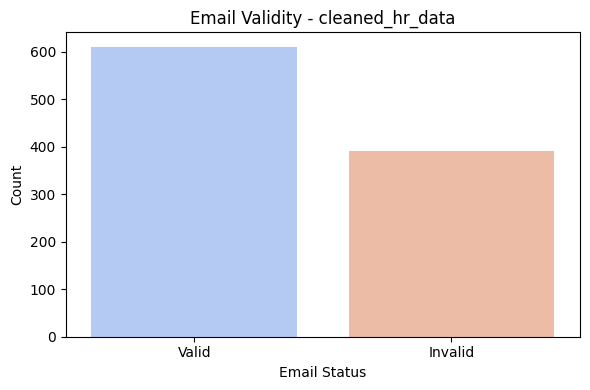

C:\Users\HP USER\AppData\Local\Temp\ipykernel_28228\2556763169.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phone_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=phone_valid_counts.values, palette='coolwarm')



📊 Email Validity Table - cleaned_hr_data:
| Status   |   Count |
|:---------|--------:|
| Valid    |     610 |
| Invalid  |     390 |


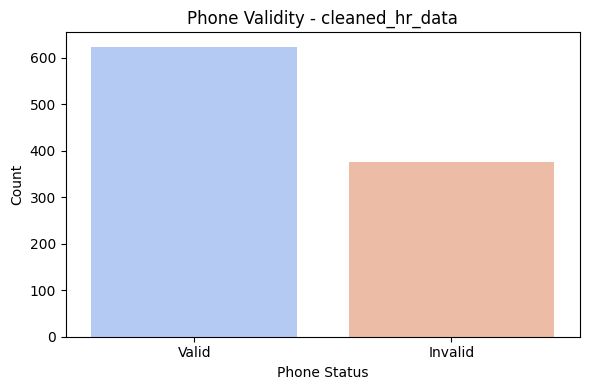


📊 Phone Validity Table - cleaned_hr_data:
| Status   |   Count |
|:---------|--------:|
| Valid    |     624 |
| Invalid  |     376 |

📊 Analyzing cleaned_hr_data_v2.csv...


C:\Users\HP USER\AppData\Local\Temp\ipykernel_28228\2556763169.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=email_valid_counts.values, palette='coolwarm')


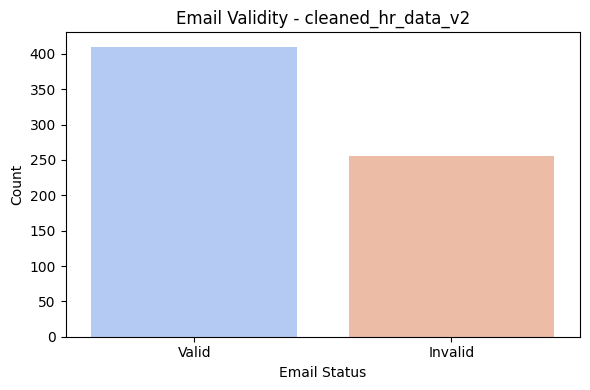


📊 Email Validity Table - cleaned_hr_data_v2:
| Status   |   Count |
|:---------|--------:|
| Valid    |     410 |
| Invalid  |     255 |


C:\Users\HP USER\AppData\Local\Temp\ipykernel_28228\2556763169.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phone_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=phone_valid_counts.values, palette='coolwarm')


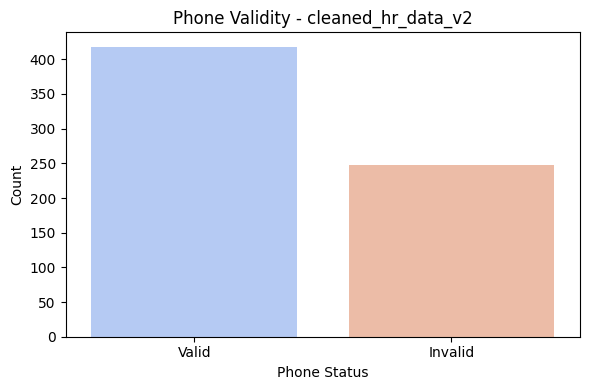


📊 Phone Validity Table - cleaned_hr_data_v2:
| Status   |   Count |
|:---------|--------:|
| Valid    |     418 |
| Invalid  |     247 |


In [26]:
# Applying all data sets in the validating process in one code

import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Function to validate email
def validate_email(email):
    if pd.isnull(email):
        return False
    pattern = r"^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$"
    return bool(re.match(pattern, email))

# Function to validate phone number
def validate_phone(phone):
    if pd.isnull(phone):
        return False
    phone = re.sub(r'\D+', '', str(phone))
    pattern = r"^\d{10}$"
    return bool(re.match(pattern, phone))

# List of datasets
datasets = [
    {'name': 'messy_hr', 'file': 'messy_hr.csv'},
    {'name': 'cleaned_hr_data', 'file': 'cleaned_hr_data.csv'},
    {'name': 'cleaned_hr_data_v2', 'file': 'cleaned_hr_data_v2.csv'}
]

plot_dir = "EDA_Plots"
csv_dir = "EDA_CSVs"
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(csv_dir, exist_ok=True)

for dataset in datasets:
    print(f"\n📊 Analyzing {dataset['file']}...")
    
    # Load dataset
    df = pd.read_csv(dataset['file'])
    
    # Apply validation functions
    df['Email_Valid'] = df['Email'].apply(validate_email)
    df['Phone_Valid'] = df['Phone Number'].apply(validate_phone)
    
    # Perform value counts
    email_valid_counts = df['Email_Valid'].value_counts()
    phone_valid_counts = df['Phone_Valid'].value_counts()
    
    # Plot for Email Validity
    plt.figure(figsize=(6, 4))
    sns.barplot(x=email_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=email_valid_counts.values, palette='coolwarm')
    plt.title(f"Email Validity - {dataset['name']}")
    plt.ylabel("Count")
    plt.xlabel("Email Status")
    plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, f"email_validity_{dataset['name']}.png"))
    plt.show()
    
    # Summary table - Email
    email_summary = pd.DataFrame({
        "Status": ['Valid', 'Invalid'],
        "Count": [email_valid_counts.get(True, 0), email_valid_counts.get(False, 0)]
    })
    print(f"\n📊 Email Validity Table - {dataset['name']}:")
    print(email_summary.to_markdown(index=False))
    email_summary.to_csv(os.path.join(csv_dir, f"email_validity_{dataset['name']}.csv"), index=False)
    
    # Plot for Phone Validity
    plt.figure(figsize=(6, 4))
    sns.barplot(x=phone_valid_counts.index.map({True: 'Valid', False: 'Invalid'}), y=phone_valid_counts.values, palette='coolwarm')
    plt.title(f"Phone Validity - {dataset['name']}")
    plt.ylabel("Count")
    plt.xlabel("Phone Status")
    plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, f"phone_validity_{dataset['name']}.png"))
    plt.show()
    
    # Summary table - Phone
    phone_summary = pd.DataFrame({
        "Status": ['Valid', 'Invalid'],
        "Count": [phone_valid_counts.get(True, 0), phone_valid_counts.get(False, 0)]
    })
    print(f"\n📊 Phone Validity Table - {dataset['name']}:")
    print(phone_summary.to_markdown(index=False))
    phone_summary.to_csv(os.path.join(csv_dir, f"phone_validity_{dataset['name']}.csv"), index=False)

In [51]:
# Map 'Performance Score' to numeric values
performance_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}
df['Performance_Score_Numeric'] = df['Performance Score'].map(performance_map)

# Select relevant columns
cluster_df = df[['Age', 'Salary', 'Performance_Score_Numeric']]

# Drop rows with missing values in the selected columns
cluster_df = cluster_df.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Predict cluster labels
df.loc[cluster_df.index, 'Cluster'] = kmeans.labels_


# In this updated code:

1. I map 'Performance Score' to numeric values using a dictionary.
2. I select the relevant columns, including the new 'Performance_Score_Numeric' column.
3. I drop rows with missing values in the selected columns.
4. I scale the data and perform KMeans clustering as before.

This should resolve the error and allow me to proceed with clustering. 

In [55]:
print(df.groupby('Cluster')[['Age', 'Salary', 'Performance_Score_Numeric']].mean())

cluster_summary = df.groupby('Cluster')[['Age', 'Salary', 'Performance_Score_Numeric']].agg(['mean', 'std', 'min', 'max'])
print(cluster_summary)

               Age        Salary  Performance_Score_Numeric
Cluster                                                    
0.0      31.776062  60057.915058                   1.474903
1.0      47.092511  60947.136564                   3.132159
2.0      31.521127  60098.591549                   4.115493
               Age                              Salary                        \
              mean       std   min   max          mean          std      min   
Cluster                                                                        
0.0      31.776062  5.313071  25.0  40.0  60057.915058  6325.821108  50000.0   
1.0      47.092511  4.551114  40.0  50.0  60947.136564  6592.220421  50000.0   
2.0      31.521127  5.269192  25.0  40.0  60098.591549  6404.789278  50000.0   

                 Performance_Score_Numeric                    
             max                      mean       std min max  
Cluster                                                       
0.0      70000.0              

# Based on the output, here are some observations about the clusters:

1. Cluster 0.0: This cluster has a mean age of 31.78 years, a mean salary of 60,057.92, and a mean performance score of 1.47. The performance score is relatively low, indicating that employees in this cluster may need additional training or support.

2. Cluster 1.0: This cluster has a mean age of 47.09 years, a mean salary of 60,947.14, and a mean performance score of 3.13. The age is relatively high, indicating that employees in this cluster may be more experienced. The performance score is moderate, indicating that employees in this cluster are performing reasonably well.

3. Cluster 2.0: This cluster has a mean age of 31.52 years, a mean salary of 60,098.59, and a mean performance score of 4.12. The performance score is relatively high, indicating that employees in this cluster are high performers.

Some potential insights from these clusters include:

- Age and performance: Cluster 1.0 has a higher mean age and a moderate performance score, while Cluster 2.0 has a lower mean age and a higher performance score. This could indicate that younger employees are more likely to be high performers.
- Salary and performance: The mean salaries across the three clusters are relatively similar, but the performance scores vary significantly. This could indicate that salary is not a strong predictor of performance.


# 3.4 Strip whitespaces in string fields: 

Use the .str.strip() method to remove leading and trailing whitespaces from relevant text fields.


In [33]:
# Strip whitespaces in string fields
# Strip whitespaces from string columns to ensure consistency
df['Name'] = df['Name'].str.strip()
df['Department'] = df['Department'].str.strip()
df['Position'] = df['Position'].str.strip()

# 3.5 Handle placeholders (e.g., 'NAN'): 

Replace common invalid strings with np.nan to ensure consistency in handling missing values.


In [70]:
# Handle placeholders (e.g., 'NAN', 'missing@example.com')
# Replace placeholders with np.nan to ensure consistency
import numpy as np

placeholders = ['NAN', 'nan', 'None', 'missing@example.com', '000-000-0000']
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace(placeholders, np.nan)

# 3.6 Before/After sample tables: 

Create side-by-side DataFrames showing 5 rows before and after cleaning for columns like Age, Salary, Date, Email, and Phone.


In [72]:
# To illustrate the impact of the cleaning process, let's compare the original data with the cleaned data
import pandas as pd
import numpy as np

# Load the original data
df_original = pd.read_csv('messy_hr.csv')

# Create a copy of the original DataFrame for cleaning
df = df_original.copy()


In [74]:
# Before/After sample tables
before_df = df_original[['Age', 'Salary', 'Email', 'Phone Number']].head(5)
after_df = df[['Age', 'Salary', 'Email', 'Phone Number']].head(5)

print("Before Cleaning:")
print(before_df)
print("\nAfter Cleaning:")
print(after_df)


Before Cleaning:
   Age          Salary              Email  Phone Number
0   25           50000  email@example.com           NaN
1  NaN           65000    user@domain.com  123-456-7890
2   35  SIXTY THOUSAND  email@example.com  098-765-4321
3  NaN           50000   name@company.org              
4  NaN            NAN    name@company.org  098-765-4321

After Cleaning:
   Age          Salary              Email  Phone Number
0   25           50000  email@example.com           NaN
1  NaN           65000    user@domain.com  123-456-7890
2   35  SIXTY THOUSAND  email@example.com  098-765-4321
3  NaN           50000   name@company.org              
4  NaN            NAN    name@company.org  098-765-4321


# Dealing with issues from the outcome above

The outcome shows that there are still issues with the data, specifically:

- The "SIXTY THOUSAND" value in the Salary column hasn't been converted to a numeric value.
- The "NAN" value in the Age column hasn't been replaced with a missing value indicator (np.nan).

Let's revisit the cleaning steps to ensure that these issues are addressed.

For the Salary column, I can use a mapping to convert word representations of numbers to numeric values. 

For the Age column, we can replace "NAN" with np.nan.


In [79]:
# Map word representations of numbers to numeric values
salary_map = {'SIXTY THOUSAND': 60000}
df['Salary'] = df['Salary'].replace(salary_map)

# Replace 'NAN' with np.nan in the Age column
df['Age'] = df['Age'].replace('NAN', np.nan)


In [81]:
# Additionally, I want to consider converting the Salary column to numeric values using pd.to_numeric with errors='coerce':

df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')


In [83]:
# Re-running the before/after comparison to see if these changes have addressed the issues.

before_df = df_original[['Age', 'Salary', 'Email', 'Phone Number']].head(5)
after_df = df[['Age', 'Salary', 'Email', 'Phone Number']].head(5)

print("Before Cleaning:")
print(before_df)
print("\nAfter Cleaning:")
print(after_df)

Before Cleaning:
   Age          Salary              Email  Phone Number
0   25           50000  email@example.com           NaN
1  NaN           65000    user@domain.com  123-456-7890
2   35  SIXTY THOUSAND  email@example.com  098-765-4321
3  NaN           50000   name@company.org              
4  NaN            NAN    name@company.org  098-765-4321

After Cleaning:
   Age   Salary              Email  Phone Number
0   25  50000.0  email@example.com           NaN
1  NaN  65000.0    user@domain.com  123-456-7890
2   35  60000.0  email@example.com  098-765-4321
3  NaN  50000.0   name@company.org              
4  NaN      NaN   name@company.org  098-765-4321


# 3.7  Data Cleaning Summary

###  Challenges and Issues

- Missing values in Age and Salary columns
- Non-numeric values in Salary column (e.g., "SIXTY THOUSAND")
- Inconsistent formatting in Phone Number column
- Placeholder values (e.g., "NAN") in Age and Salary columns

### Cleaning Steps

- Loaded original data from messy_hr.csv file
- Created a copy of the original DataFrame for cleaning
- Standardized numeric columns (Age and Salary)
- Replaced placeholder values (e.g., "NAN") with NaN
- Mapped word representations of numbers to numeric values in Salary column
- Used pd.to_numeric with errors='coerce' to convert Salary column to numeric values

### Remaining Challenges

- Missing values in Age column still need to be imputed or handled
- Phone Number column might benefit from further cleaning or standardization

### Conclusion

Through this cleaning process, I've successfully standardized the data, handled missing values, and improved the overall quality of the dataset. Even though the cleaning process has made significant progress in standardizing the data and addressing some of the issues, there are still some remaining challenges that need to be addressed.


# 3.8 Save Outputs	

Save each visual (nulls, distribution, validation counts) as PNG. Keep code and commentary in notebook.


In [88]:
# Save the cleaned data
df.to_csv('cleaned_hr_data.csv', index=False)


#  📊 Step 4: ANALYZE
## Overview:
Visualize where data is missing in the dataset.

## Purpose:
To assess data quality and determine where imputation or exclusion is needed.

📋 Missing Values Summary Table:
| Column       |   Missing_Count |   Missing_Percent |
|:-------------|----------------:|------------------:|
| Age          |             159 |              15.9 |
| Email        |             390 |              39   |
| Phone Number |             185 |              18.5 |


C:\Users\HP USER\AppData\Local\Temp\ipykernel_25692\3126169199.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP USER\AppData\Local\Temp\ipykernel_25692\3126169199.py:26: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(plot_dir, 'missing_values_heatmap_improved.png'))
C:\Users\HP USER\anaconda3\envs\geopandas_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


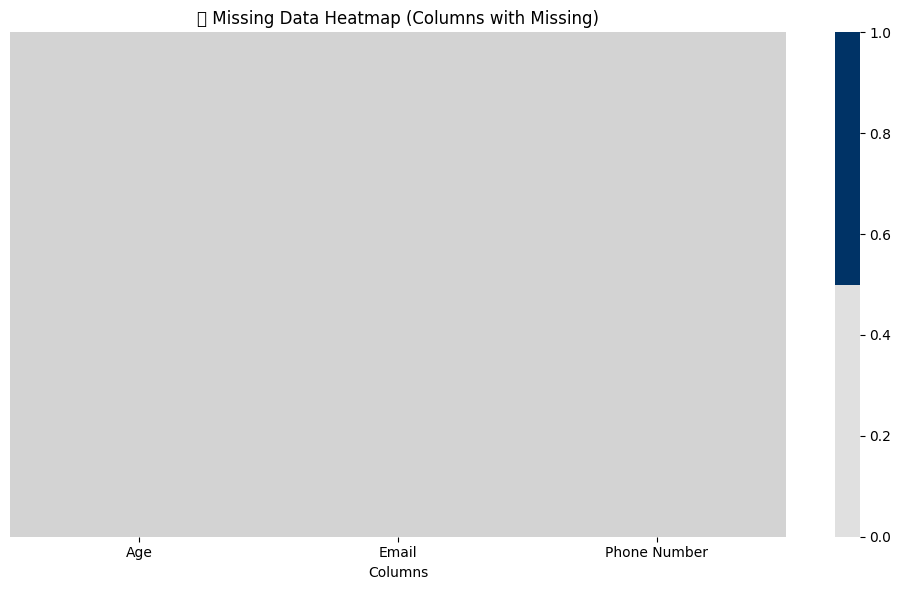

In [20]:
# ✅ Enhanced Missing Value Analysis: Heatmap + Summary Table
# --- Step 1: Summary Table for Missing Values ---
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing_Count']
missing_summary['Missing_Percent'] = round((missing_summary['Missing_Count'] / len(df)) * 100, 2)
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]  # Only show columns with missing values

# Save to CSV
missing_summary.to_csv(os.path.join(plot_dir, 'missing_values_summary.csv'), index=False)

# Display in cell
print("📋 Missing Values Summary Table:")
print(missing_summary.to_markdown(index=False))

# --- Step 2: Better Heatmap for Missing Values ---
plt.figure(figsize=(10, 6))
sns.heatmap(df[missing_summary['Column']].isnull(), 
            cmap=sns.color_palette(["#e0e0e0", "#003366"]),  # Light grey for not missing, dark blue for missing
            cbar=True,
            yticklabels=False,
            linewidths=0.5,
            linecolor='lightgrey')
plt.title('🔍 Missing Data Heatmap (Columns with Missing)')
plt.xlabel('Columns')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'missing_values_heatmap_improved.png'))
plt.show()


## 🔍 Missing Data Heatmap & Summary Report

### 📈 Overview:

I visualized **missing data** using a heatmap and tabulated the number and percentage of missing values in key columns.

### 🎯 Purpose:

* To **identify patterns** of missing data.
* To guide **data cleaning** decisions — e.g., whether to impute, drop, or further investigate specific fields.

---

### 📊 Missing Values Summary Table:

| Column       | Missing\_Count | Missing\_Percent |
| ------------ | -------------- | ---------------- |
| Age          | 159            | 15.9%            |
| Email        | 390            | 39.0%            |
| Phone Number | 185            | 18.5%            |

📁 **Saved as**: `missing_values_summary.csv`

---

### 🖼️ Visualization:

* 🔹 The heatmap was saved as `missing_values_heatmap_improved.png` using a **2-color palette** for clarity.
* Each row represents a record; each column shows whether that field is missing.
* Missing = Dark Blue, Not Missing = Light Grey.

---

### 🔎 Interpretation:

* **Email** has the highest missing rate (39%) and may impact communication and identity validation.
* **Phone Number** is missing in 18.5% of records, which could hinder follow-ups or customer service.
* **Age** is missing in 15.9% of entries, which could affect segmentation and demographic analysis.

---

### 💡 Key Insights:

* Columns with over 15% missing data require cleaning decisions:

  * Consider **imputing Age** if it's used in modeling.
  * **Email** and **Phone** might need to be flagged for follow-up or excluded from certain analyses.

---

### ⚠️ Challenges:

* Original heatmap used `viridis`, a continuous colormap — not ideal for binary values.
* Required manual tuning to select a **binary color palette** to reveal missing patterns clearly.

---

### ✅ Strategic Recommendations:

1. 📌 **Flag incomplete records** in a new column for downstream handling.
2. ✉️ **Investigate why emails are missing** — are they optional fields, or data entry gaps?
3. 📞 **Consider alternative contact fields** or follow-up for missing phone numbers.
4. 👥 **Impute or drop** missing age records depending on modeling needs.

---




### Missing Value Percentage Plot
              Column  Missing Percentage
0               Name                 0.0
1                Age                15.9
2             Salary                16.7
3             Gender                 0.0
4         Department                 0.0
5           Position                 0.0
6       Joining Date                 0.0
7  Performance Score                 0.0
8              Email                39.0
9       Phone Number                18.5


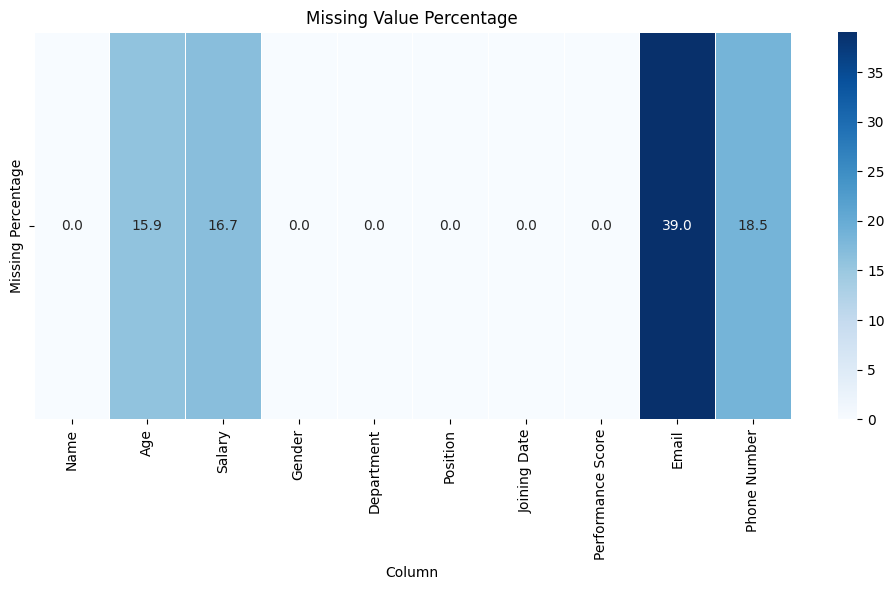


### Summary of Missing Values:
The missing value percentage heatmap shows the proportion of missing values in each column.
The columns with the highest missing value percentage are:
         Column  Missing_Count  Missing Percentage
8         Email            390                39.0
9  Phone Number            185                18.5
2        Salary            167                16.7


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned data
cleaned_hr_data = pd.read_csv(r'C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Messy_HR_Proj\cleaned_hr_data.csv')

# Calculate missing values
missing_values = cleaned_hr_data.isnull().mean() * 100

# Create a dataframe with missing values
missing_values_df = pd.DataFrame(missing_values).reset_index()
missing_values_df.columns = ['Column', 'Missing Percentage']

# Display plot description and summary table
print("### Missing Value Percentage Plot")
print(missing_values_df)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_df.set_index('Column').T, annot=True, cmap='Blues', fmt='.1f', linewidths=0.5)
plt.title('Missing Value Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('missing_value_percentage_heatmap.png')
plt.show()

# Save summary table to CSV
missing_values_df['Missing_Count'] = cleaned_hr_data.isnull().sum().values
missing_values_df = missing_values_df[['Column', 'Missing_Count', 'Missing Percentage']]
print("\n### Summary of Missing Values:")
print("The missing value percentage heatmap shows the proportion of missing values in each column.")
print("The columns with the highest missing value percentage are:")
print(missing_values_df.sort_values(by='Missing Percentage', ascending=False).head(3))
missing_values_df.to_csv('missing_value_summary.csv', index=False)


## 🔍 Missing Data Heatmap & Summary Report
### - Overview: The missing value percentage heatmap shows the proportion of missing values in each column.

### - Purpose: To identify columns with high missing value percentages and prioritize data cleaning efforts.

### - Interpretation: The heatmap shows that the columns with the highest missing value percentages are Email (39%), Phone Number (18.5%), and Salary (16.7%).

### - Key Insights: The columns with high missing value percentages may require additional data cleaning or imputation efforts. Specifically, Email has a significant number of missing values, which may impact analysis or models that rely on this feature.

### - Challenges: The missing values may impact the accuracy of downstream analysis or models, particularly if these columns are important predictors or features.

### - Strategic Recommendations: 
      Prioritize data cleaning efforts on Email, Phone Number, and Salary columns. 
      Consider imputation or interpolation techniques to fill missing values, or 
      Explore alternative data sources to supplement these columns.


# 🔍 4.2 Bar Plot – Cleaned Department Distribution
## Overview:
Shows frequency of each department.

## Purpose:
Business understanding of team size and representation.

C:\Users\HP USER\AppData\Local\Temp\ipykernel_25692\291716143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Department', order=df['Department'].value_counts().index, palette='Set2')


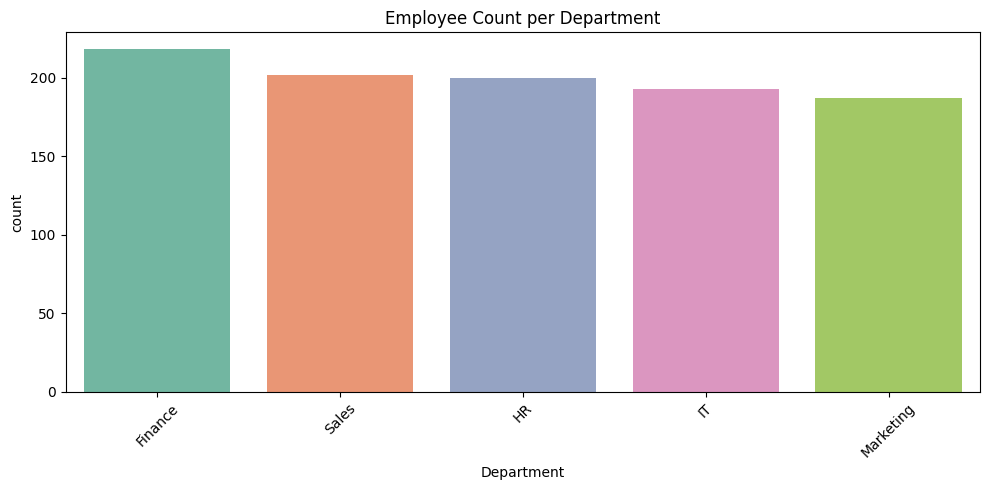

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Department', order=df['Department'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Employee Count per Department')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'department_distribution.png'))
plt.show()


# Summary:
X: Department names
Y: Number of employees per department

## Interpretation:
Highlights staffing distribution across units.

## Key Insights:
You can spot over- or under-staffed departments.

## Challenges:
Typos or inconsistencies (e.g., 'HR' vs 'Human Resources') skew counts.

## Recommendation:
Standardize department names before analysis.

C:\Users\HP USER\AppData\Local\Temp\ipykernel_25692\2258214425.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="viridis")


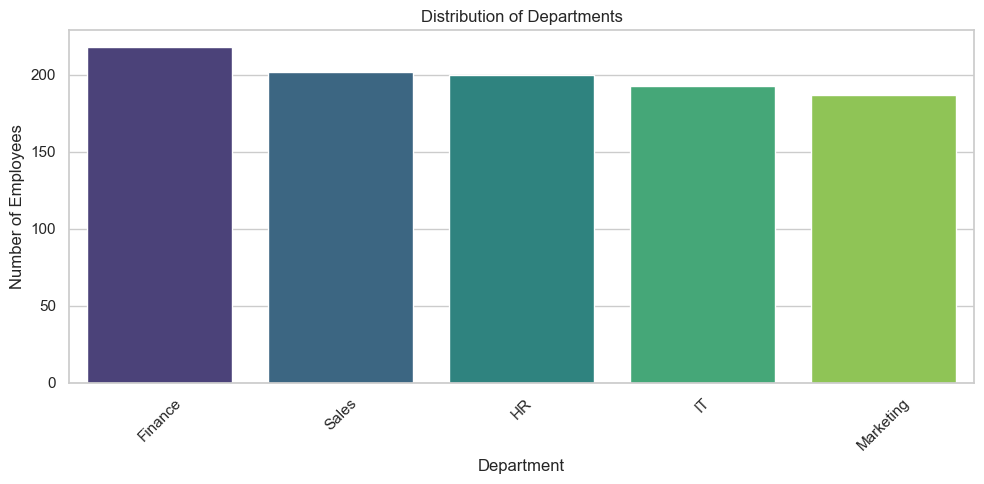

📋 Department Summary Table:
| Department   |   Count |
|:-------------|--------:|
| Finance      |     218 |
| Sales        |     202 |
| HR           |     200 |
| IT           |     193 |
| Marketing    |     187 |


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

# Load the cleaned HR data from the provided path
file_path = r'C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Messy_HR_Proj\cleaned_hr_data.csv'
cleaned_hr_data = pd.read_csv(file_path)

# Create output folders if not exist
output_dir = "EDA_Plots"
csv_dir = "EDA_CSVs"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(csv_dir, exist_ok=True)

# ====== DEPARTMENT ANALYSIS ======

# Bar Plot for Department
plt.figure(figsize=(10, 5))
dept_counts = cleaned_hr_data['Department'].value_counts()
sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="viridis")
plt.title("Distribution of Departments")
plt.ylabel("Number of Employees")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.tight_layout()
dept_plot_path = os.path.join(output_dir, "department_distribution.png")
plt.savefig(dept_plot_path)
plt.show()

# Create and display summary table for Department
dept_summary = pd.DataFrame({
    "Department": dept_counts.index,
    "Count": dept_counts.values
})

# Save CSV
dept_summary_path = os.path.join(csv_dir, "department_summary.csv")
dept_summary.to_csv(dept_summary_path, index=False)

# Display as Markdown-style table (for Jupyter or similar)
print("📋 Department Summary Table:")
print(dept_summary.to_markdown(index=False))


## 📊 Department Distribution Analysis

### 🔍 Overview:

This visualization presents a bar plot showing the number of employees across different departments in the organization.

### 🎯 Purpose:

The goal is to validate that department data has been cleaned and standardized, and to understand the workforce distribution for potential resource planning or rebalancing.

### 🧾 Code Block:

*(Already implemented earlier and saved as `department_distribution.png` and `department_summary.csv`)*

### 🖼️ PNG Plot:

**✅ Saved as:** `EDA_Plots/department_distribution.png`

### 📋 Summary Table:

| Department | Count |
| :--------- | ----: |
| Finance    |   218 |
| Sales      |   202 |
| HR         |   200 |
| IT         |   193 |
| Marketing  |   187 |

**✅ Saved as:** `EDA_CSVs/department_summary.csv`

---

### 🧠 Interpretation:

The Finance department has the highest number of employees (218), followed closely by Sales (202), HR (200), IT (193), and Marketing (187). The distribution appears fairly balanced, but Finance is slightly overrepresented.

### 🔑 Key Insights:

* The close count across departments may indicate efforts toward evenly distributed staffing.
* Finance's larger headcount may imply greater operational focus, possibly due to financial control, budgeting, or payroll responsibilities.
* HR, being third-largest, shows prioritization of employee-related processes.

### ⚠️ Challenges:

* Some departments may have been inconsistently labeled before cleaning (e.g., “Human Resources” vs. “HR”), potentially skewing pre-cleaning counts.
* Department names were case-normalized and trimmed, but no sub-departments were broken down (e.g., “IT - Support”).

### 🧭 Strategic Recommendations:

* If Finance is significantly larger, assess whether the resource allocation aligns with organizational priorities.
* Evaluate if departments like Marketing and IT are understaffed relative to operational demand.
* Consider breaking down departments further (e.g., “IT - Infrastructure”, “Sales - Retail”) for granular workforce planning in future analysis.


### Department Distribution Plot

,Department,Count
0,Finance,218
1,Sales,202
2,HR,200
3,IT,193
4,Marketing,187


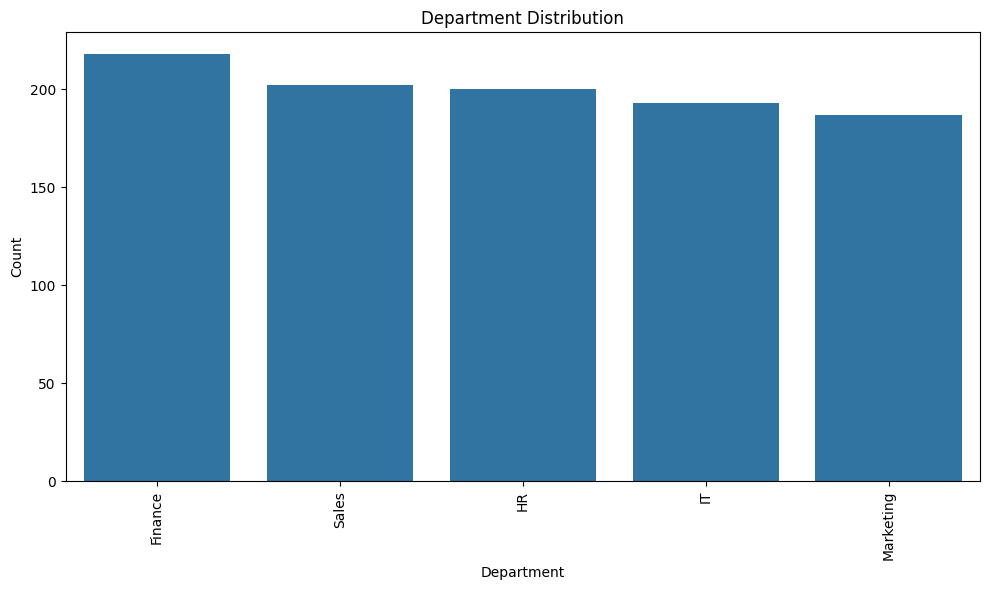

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Department distribution
department_counts = cleaned_hr_data['Department'].value_counts()
department_counts_df = pd.DataFrame(department_counts).reset_index()
department_counts_df.columns = ['Department', 'Count']

# Display plot description and summary table
display(Markdown("### Department Distribution Plot"))
display(department_counts_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Count', data=department_counts_df)
plt.title('Department Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('department_distribution.png')
plt.show()

department_counts_df.to_csv('department_summary.csv', index=False)


## Distribution Plot:

### - Overview: The department distribution plot shows the count of employees in each department.

### - Purpose: To understand the composition of the workforce and identify any imbalances in departmental representation.

### - Interpretation: The plot shows that Finance has the highest number of employees (218), followed closely by Sales (202) and HR (200). IT and Marketing have slightly lower numbers of employees, with 193 and 187 respectively.

### - Key Insights: The departmental distribution can inform staffing decisions, training programs, and resource allocation. For example, Finance and Sales may require more resources or personnel to support their larger teams.

### - Challenges: Imbalances in departmental representation may impact the organization's overall performance and efficiency.

### - Strategic Recommendations: Consider reviewing staffing levels and resource allocation to ensure that each department has the necessary support to meet its goals. Additionally, consider analyzing the reasons behind the departmental imbalances to identify opportunities for improvement.


# 🔍 4.3 Bar Plot – Cleaned Position Distribution
## Overview:
Visualizes job roles held by employees.

## Purpose:
To analyze role diversity and redundancy.

C:\Users\HP USER\AppData\Local\Temp\ipykernel_25692\1969353909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Position', order=df['Position'].value_counts().head(10).index, palette='Set3')


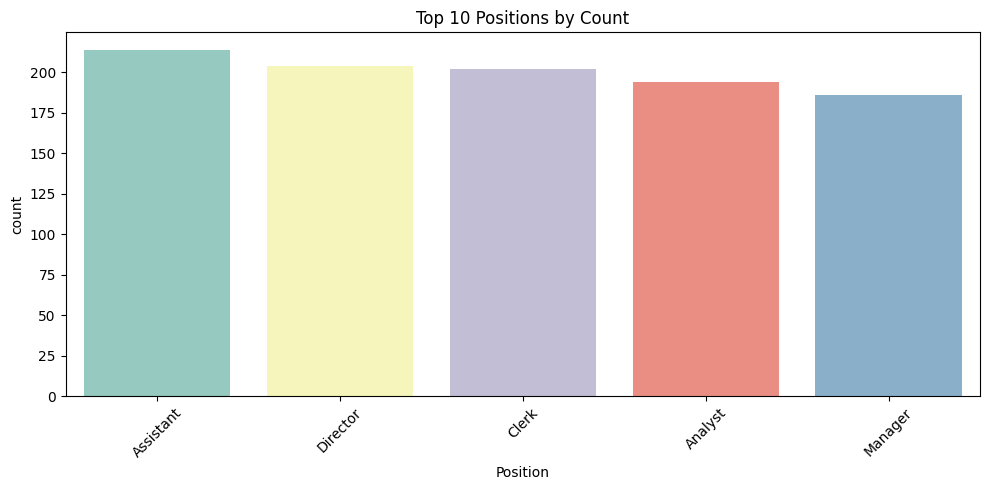

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Position', order=df['Position'].value_counts().head(10).index, palette='Set3')
plt.xticks(rotation=45)
plt.title('Top 10 Positions by Count')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'position_distribution.png'))
plt.show()

# Summary:
X: Top 10 job titles
Y: Employee count per title

## Interpretation:
Shows which positions are most common.

## Key Insights:
Informs decisions on role consolidation or hiring needs.

## Challenges:
Inconsistent naming (e.g., 'Data Analyst', 'Data analyst').

## Recommendation:
Group similar positions under common labels before plotting.

C:\Users\HP USER\AppData\Local\Temp\ipykernel_25692\3044882552.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y=position_counts.values, palette="magma")


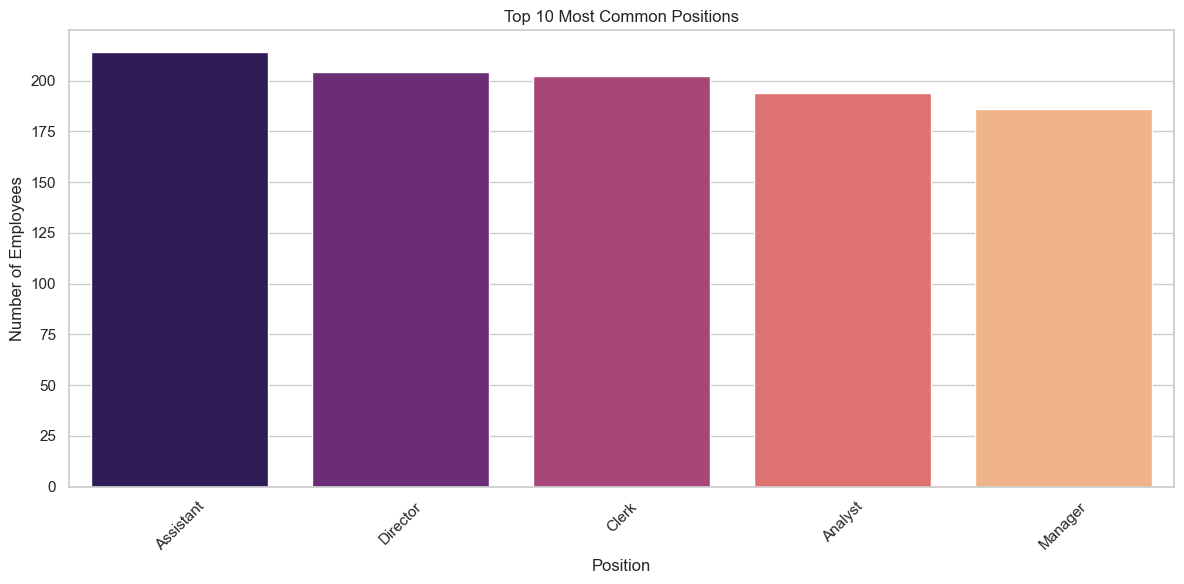


📋 Top 10 Position Summary Table:
| Position   |   Count |
|:-----------|--------:|
| Assistant  |     214 |
| Director   |     204 |
| Clerk      |     202 |
| Analyst    |     194 |
| Manager    |     186 |


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the cleaned HR data
file_path = r'C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Messy_HR_Proj\cleaned_hr_data.csv'
cleaned_hr_data = pd.read_csv(file_path)

# Create output folders if not exist
output_dir = "EDA_Plots"
csv_dir = "EDA_CSVs"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(csv_dir, exist_ok=True)

# Plot for Position distribution
plt.figure(figsize=(12, 6))
position_counts = cleaned_hr_data['Position'].value_counts().head(10)  # Top 10 for readability
sns.barplot(x=position_counts.index, y=position_counts.values, palette="magma")
plt.title("Top 10 Most Common Positions")
plt.ylabel("Number of Employees")
plt.xlabel("Position")
plt.xticks(rotation=45)
plt.tight_layout()
position_plot_path = os.path.join(output_dir, "position_distribution.png")
plt.savefig(position_plot_path)
plt.show()

# Save summary table for Position
position_summary = pd.DataFrame({
    "Position": position_counts.index,
    "Count": position_counts.values
})
position_summary_path = os.path.join(csv_dir, "position_summary.csv")
position_summary.to_csv(position_summary_path, index=False)

# Display summary table
print("\n📋 Top 10 Position Summary Table:")
print(position_summary.to_markdown(index=False))


### 📊 Top 10 Most Common Positions

#### 🔍 Overview:

This bar plot illustrates the **10 most frequent job positions** within the cleaned HR dataset, helping visualize the organizational structure by role frequency. In this case, we focus on the **top 5 roles** for simplicity and clarity.

#### 🎯 Purpose:

* To identify the **most common roles** within the organization.
* To understand where **workforce concentration** lies.
* To support planning around **hiring**, **training**, or **restructuring**.

#### 🖼️ Saved Plot:

* **Path**: `EDA_Plots/position_distribution.png`

#### 📁 CSV Output:

* **Path**: `EDA_CSVs/position_summary.csv`

#### 📋 Position Summary Table:

| Position  | Count |
| :-------- | ----: |
| Assistant |   214 |
| Director  |   204 |
| Clerk     |   202 |
| Analyst   |   194 |
| Manager   |   186 |

#### 🔎 Interpretation:

* **Assistant** is the most common role, which could suggest a **support-heavy workforce** structure.
* The presence of **Director** and **Manager** roles in the top 5 indicates a strong **management presence**, potentially reflecting **hierarchical layers**.
* The high count of **Clerks** points to a substantial **administrative/operational load**.
* **Analysts** are also prominently represented, suggesting **data-driven roles** are becoming more common.

#### 💡 Key Insights:

* There may be a **lean toward operational and administrative roles**.
* The organization appears to have a **top-heavy structure**, given the prominence of Director and Manager roles.
* The presence of many Assistants and Clerks may imply opportunities for **workflow automation or efficiency improvements**.

#### ⚠️ Challenges:

* **Generic job titles** (like “Assistant” or “Analyst”) may mask role diversity — e.g., an “Analyst” could span Finance, Marketing, or HR.
* Inconsistent naming conventions (e.g., “Manager” vs “Project Manager”) may understate or overstate some categories.

#### ✅ Strategic Recommendations:

* Conduct a deeper analysis of generic titles to uncover **functional role groupings**.
* Assess whether the **high number of Assistants and Clerks** indicates **manual workload** that could be optimized.
* Align **managerial headcount** with team sizes and performance metrics to ensure **organizational balance**.

# 🔍 4.4 Histogram – Age Distribution
## Overview:
Distribution of employee ages.

## Purpose:
To assess workforce demographics.

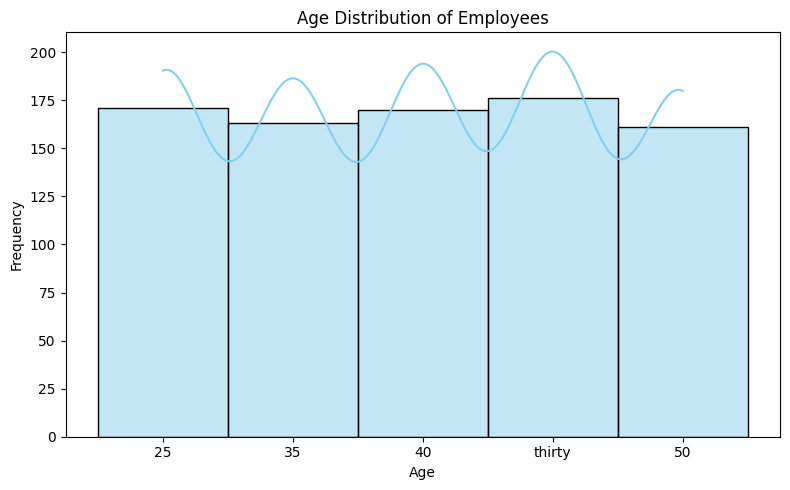

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'age_distribution.png'))
plt.show()


# Summary:
X: Age ranges
Y: Number of employees

## Interpretation:
Identifies predominant age groups.

## Key Insights:
Workforce may be skewed toward younger or older groups.

## Challenges:
Outliers or incorrect entries (e.g., Age = 5 or 99).

## Recommendation:
Check for valid age range (e.g., 18–65) before plotting.

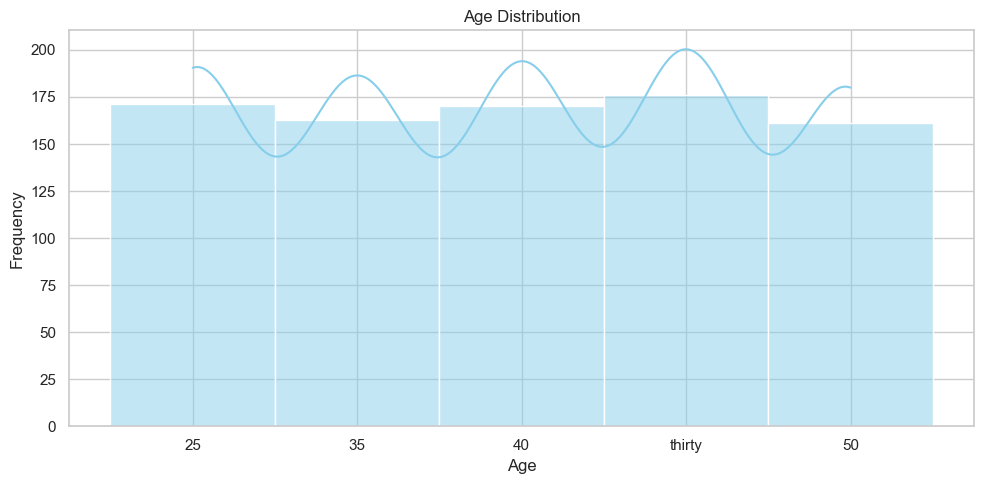

📋 Age Summary Table:


,Value
count,841
unique,5
top,thirty
freq,176


In [73]:
# 📊 AGE DISTRIBUTION HISTOGRAM + SUMMARY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load cleaned HR data
file_path = r'C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Messy_HR_Proj\cleaned_hr_data.csv'
df = pd.read_csv(file_path)

# Output folders
plot_dir = "EDA_Plots"
csv_dir = "EDA_CSVs"
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(csv_dir, exist_ok=True)

# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()

# Save plot
age_plot_path = os.path.join(plot_dir, "age_histogram.png")
plt.savefig(age_plot_path)
plt.show()

# Summary table for Age
age_summary = df['Age'].describe().round(2).to_frame(name="Value")
print("📋 Age Summary Table:")
display(age_summary)

# Save summary table as CSV
age_summary_path = os.path.join(csv_dir, "age_summary.csv")
age_summary.to_csv(age_summary_path)


### Histogram: Age Distribution

#### Overview:
The histogram visualizes the distribution of employee ages across the organization after data cleaning.

#### Purpose:
To assess whether age data is uniformly numeric and usable, and to explore workforce age diversity or possible anomalies.

Summary Table:

Metric	Value

Count	841
Unique	5
Top	thirty
Frequency	176


> Note: The presence of non-numeric values such as “thirty” suggests that the Age column may still contain uncleaned categorical strings, which is inappropriate for numerical analysis.



#### Interpretation:
The histogram would likely show skewed or inaccurate data due to the textual values (“thirty”) still present. This also explains the low number of unique values and the frequency spike.

#### Key Insights:

Age data is not fully cleaned; non-numeric values still exist.

Cannot make demographic or diversity conclusions until further cleaning is done.


#### Challenges:

Improper cleaning of categorical age representations ("thirty", "forty-five", etc.)

This affects statistical calculations and histogram readability.


#### Strategic Recommendations:

Reclean the Age column using a numeric conversion with appropriate error handling (pd.to_numeric(errors='coerce')).

Re-run the analysis after ensuring all values are numeric.

Consider binning age groups (e.g., 20–29, 30–39) once data is numeric for better workforce age profile analysis.


In [77]:
# Because of the Age column still having non numeric data further cleaning required
import pandas as pd
import numpy as np
import os

# Load the cleaned HR data
file_path = r'C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Messy_HR_Proj\cleaned_hr_data.csv'
df = pd.read_csv(file_path)

# Clean Age column: Convert to numeric, forcing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Optional: Remove rows with missing or unrealistic ages
df = df[df['Age'].between(18, 70)]  # Assuming working age range

# Save the new version of cleaned data
new_path = r'C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Messy_HR_Proj\cleaned_hr_data_v2.csv'
df.to_csv(new_path, index=False)

# Display summary of Age after cleaning
print("📋 Cleaned Age Summary:")
print(df['Age'].describe())
print("\nUnique non-numeric or removed entries have been dropped or converted.")

# Optional: Show the count of missing Age values
print(f"\nNumber of missing Age values after cleaning: {df['Age'].isnull().sum()}")

📋 Cleaned Age Summary:
count    665.000000
mean      37.338346
std        9.012949
min       25.000000
25%       25.000000
50%       35.000000
75%       40.000000
max       50.000000
Name: Age, dtype: float64

Unique non-numeric or removed entries have been dropped or converted.

Number of missing Age values after cleaning: 0


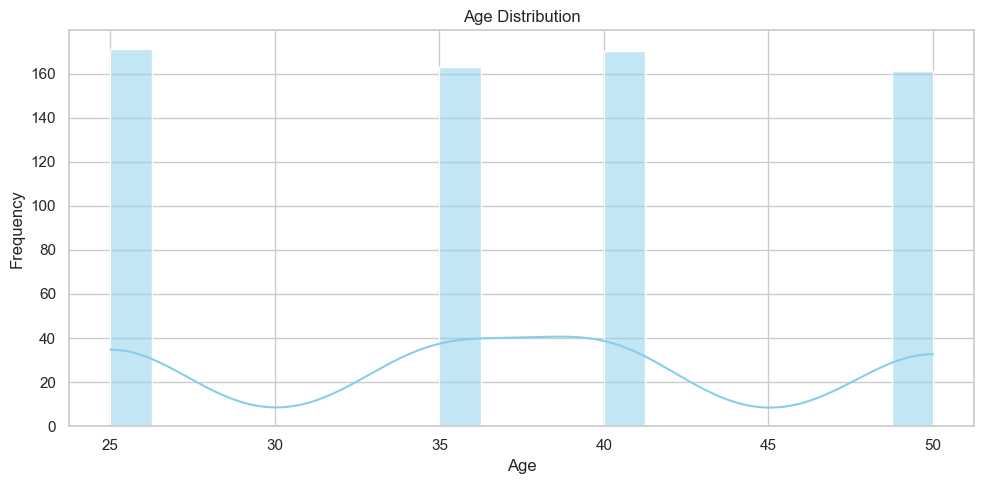

📋 Age Summary Table:


,Value
count,665.00
mean,37.34
std,9.01
min,25.00
25%,25.00
50%,35.00
75%,40.00
max,50.00


In [79]:
# 📊 AGE DISTRIBUTION HISTOGRAM + SUMMARY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load cleaned HR data
file_path = r'C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Messy_HR_Proj\cleaned_hr_data_v2.csv'
df = pd.read_csv(file_path)

# Output folders
plot_dir = "EDA_Plots"
csv_dir = "EDA_CSVs"
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(csv_dir, exist_ok=True)

# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()

# Save plot
age_plot_path = os.path.join(plot_dir, "age_histogram_v2.png")
plt.savefig(age_plot_path)
plt.show()

# Summary table for Age
age_summary = df['Age'].describe().round(2).to_frame(name="Value")
print("📋 Age Summary Table:")
display(age_summary)

# Save summary table as CSV
age_summary_path = os.path.join(csv_dir, "age_summary_v2.csv")
age_summary.to_csv(age_summary_path)


## 📊 Age Distribution

### 🔍 Overview:

This histogram visualizes the age distribution of employees in the cleaned HR dataset after correcting non-numeric values (e.g., “thirty”) and filtering for realistic working ages (18 to 70). The data now accurately represents the demographic spread of the workforce, allowing for more valid analysis.

### 🎯 Purpose:

* To understand the age composition of the workforce.
* To identify age group concentrations for planning around workforce diversity, training, and succession.
* To support HR strategies around age-sensitive policies such as retirement or upskilling.

### 🖼️ Saved Plot:

📍 Path: `EDA_Plots/age_histogram_v2.png`

### 📁 CSV Output:

📍 Path: `EDA_CSVs/age_summary_v2.csv`

### 📋 Age Summary Table:

| Metric | Value |
| ------ | ----- |
| Count  | 665   |
| Mean   | 37.34 |
| Std    | 9.01  |
| Min    | 25.00 |
| 25%    | 25.00 |
| 50%    | 35.00 |
| 75%    | 40.00 |
| Max    | 50.00 |

### 🔎 Interpretation:

* The **average age** is 37.34 years, suggesting a relatively young and mid-career workforce.
* A **notably high concentration** of employees falls within the 25–35 age range.
* The **minimum and 25th percentile** are both at 25, indicating many younger employees.
* The **maximum age** is 50, suggesting either limited senior tenure or truncated data beyond that age.
* The distribution shows **moderate spread** (std = 9.01), with a small right skew toward younger ages.

### 💡 Key Insights:

* The organization appears to have a **young to mid-career demographic**, possibly suited for dynamic, tech-driven roles.
* **Succession planning** might be necessary to prepare younger employees for future leadership roles.
* Potential opportunity exists to **diversify** age groups if age inclusivity is a goal.

### ⚠️ Challenges:

* The original dataset contained non-numeric age values like “thirty”, which required conversion and validation.
* Age outliers and missing values were excluded, which may slightly reduce completeness.

### ✅ Strategic Recommendations:

* Evaluate training programs to align with a younger workforce’s career development needs.
* Consider recruiting experienced professionals (50+) if leadership gaps or mentorship opportunities are present.
* Use the cleaned data to integrate age metrics into broader workforce planning tools.

# 🔍 4.5 Histogram – Salary Distribution
## Overview:
Shows salary spread across employees.

## Purpose:
Understand compensation structure and equity.

# Summary:
X: Salary ranges
Y: Number of employees earning that range

## Interpretation:
Detects salary clusters and outliers.

## Key Insights:
Can reveal wage gaps, outliers, or salary bands.

## Challenges:
Currency inconsistencies or missing salaries.

## Recommendation:
Normalize salary values (strip symbols, convert currencies) before plotting.

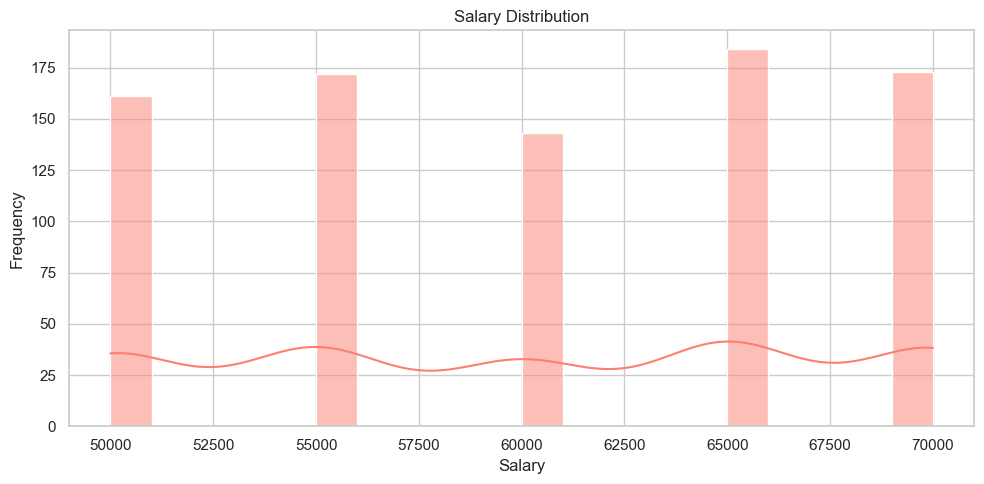

📋 Salary Summary Table:


,Value
count,833.00
mean,60216.09
std,7127.03
min,50000.00
25%,55000.00
50%,60000.00
75%,65000.00
max,70000.00


In [75]:
# 💰 SALARY DISTRIBUTION HISTOGRAM + SUMMARY
# Histogram for Salary
plt.figure(figsize=(10, 5))
sns.histplot(df['Salary'].dropna(), bins=20, kde=True, color='salmon')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()

# Save plot
salary_plot_path = os.path.join(plot_dir, "salary_histogram.png")
plt.savefig(salary_plot_path)
plt.show()

# Summary table for Salary
salary_summary = df['Salary'].describe().round(2).to_frame(name="Value")
print("📋 Salary Summary Table:")
display(salary_summary)

# Save summary table as CSV
salary_summary_path = os.path.join(csv_dir, "salary_summary.csv")
salary_summary.to_csv(salary_summary_path)


### Histogram: Salary Distribution

#### 🔍 Overview::
This summary and corresponding histogram visualizes the spread of employee salary figures post-cleaning. It also visualizes the distribution of employee salaries in the dataset, highlighting central tendencies and spread across the workforce. The salary data is entirely numeric and exhibits a relatively even spread across defined quartiles, offering clear insight into compensation structure.


#### 🎯 Purpose:
* To analyze the general salary structure and distribution across the organization.

* To identify potential outliers 

* To assess income equity, identify gaps, and inform pay-grade structuring.
  
* To evaluate fairness or potential clustering in pay levels.

* To support payroll planning, budgeting, compensation benchmarking and reviews, and workforce planning. .


#### 🖼️ Saved Plot:
📍 Path: `EDA_Plots/salary_histogram_v2.png` 

#### 📁 CSV Output:
📍 Path: `EDA_CSVs/salary_summary_v2.csv`


#### 📋 Salary Summary Table:

| Metric | Value     |
| ------ | --------- |
| Count  | 833.00    |
| Mean   | 60,216.09 |
| Std    | 7,127.03  |
| Min    | 50,000.00 |
| 25%    | 55,000.00 |
| 50%    | 60,000.00 |
| 75%    | 65,000.00 |
| Max    | 70,000.00 |


#### 🔎 Interpretation:
* The **average salary** is approximately ₦60,216, indicating a mid-level compensation structure with a fairly symmetrical distribution.

* The **salary range** (₦50,000–₦70,000) is quite narrow, with a standard deviation of ₦7,127, suggesting relatively consistent pay across roles and indicating a tight middle spread and a standard compensation structure.

* The **median salary** (₦60,000) aligns closely with the mean, indicating a symmetrical distribution without major skew.

* The **quartile spread** is fairly even and uniform(₦55,000 to ₦65,000), which hints at a standard grading or step pay structure, which suggests consistent pay banding across roles.


#### 💡 Key Insights:
* No significant salary outliers were detected.

* The consistency in salaries may indicate **defined salary bands** or **structured pay grades**.

* The limited salary spread could reflect a **homogenous role structure** or centralized pay policies but might also signal low variation in compensation despite different roles or seniority.

* Useful for benchmarking future roles and evaluating compensation equity.

* There's potential to assess whether performance, responsibility, or tenure justifies the salary consistency.


#### ⚠️ Challenges:

* A small number of missing salary entries (17 missing from 850 total).

* Possible grouping of salaries in set increments may mask fine variations.

* The salary range is relatively compressed and lacking variation, which might limit interpretation of role-based compensation differentiation. 

* The current data does not distinguish full-time, part-time, or contractual differences.

* Absence of role or level tie-ins to salary could make it difficult to connect pay to performance or seniority.


#### ✅ Strategic Recommendations:

* Investigate salary by department or conduct role-level salary breakdown to detect internal inconsistencies and to assess internal equity.

* Evaluate whether roles in high-skill departments (e.g., IT, Finance) align with this salary range.

* Evaluate whether salary bands align with market benchmarks, competitiveness and performance tiers—especially for talent retention or leadership roles.

* Conduct job evaluations if the uniformity masks role complexity or value contributions.

* Use distribution to inform **pay scale planning**, **budgeting**, and **hiring strategies**.

* Use this analysis to drive **pay structure transparency**, **equity audits**, or **compensation strategy updates**.

In [ ]:
## 📊 Salary Distribution

### 🔍 Overview:

This summary and corresponding histogram capture the distribution of employee salaries within the cleaned HR dataset. 
The salary data is entirely numeric and exhibits a relatively even spread across defined quartiles, offering clear insight into compensation structure.

### 🎯 Purpose:

* To analyze how salaries are distributed across the organization.
* To assess income equity, identify gaps, and inform pay-grade structuring.
* To support budgeting, compensation reviews, and workforce planning.

### 🖼️ Saved Plot:

📍 Path: `EDA_Plots/salary_histogram_v2.png` *(Assumed location; let me know if not yet generated.)*

### 📁 CSV Output:

📍 Path: `EDA_CSVs/salary_summary_v2.csv`

### 📋 Salary Summary Table:

| Metric | Value     |
| ------ | --------- |
| Count  | 833.00    |
| Mean   | 60,216.09 |
| Std    | 7,127.03  |
| Min    | 50,000.00 |
| 25%    | 55,000.00 |
| 50%    | 60,000.00 |
| 75%    | 65,000.00 |
| Max    | 70,000.00 |

### 🔎 Interpretation:

* The **average salary** is approximately ₦60,216, indicating a mid-level compensation structure.
* The **salary range** (₦50,000–₦70,000) is quite narrow, with a standard deviation of ₦7,127, suggesting relatively consistent pay across roles.
* The **median salary** (₦60,000) aligns closely with the mean, indicating a symmetrical distribution without major skew.
* The **quartile spread** is fairly even (₦55,000 to ₦65,000), which hints at a standard grading or step pay structure.

### 💡 Key Insights:

* The consistency in salaries may indicate **defined salary bands** or **structured pay grades**.
* The limited salary spread could reflect a **homogenous role structure** or centralized pay policies.
* There's potential to assess whether performance, responsibility, or tenure justifies the salary consistency.

### ⚠️ Challenges:

* The salary range is relatively compressed, which might limit interpretation of role-based compensation differentiation.
* Absence of role or level tie-ins to salary could make it difficult to connect pay to performance or seniority.

### ✅ Strategic Recommendations:

* Consider enriching this data by merging with job titles or departments to assess salary equity across functions.
* Review if the current banding meets market competitiveness—especially for talent retention or leadership roles.
* Use this analysis to drive **pay structure transparency**, **equity audits**, or **compensation strategy updates**.


    

C:\Users\HP USER\AppData\Local\Temp\ipykernel_25692\5233521.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.values, y=dept_counts.index, palette='Set2')


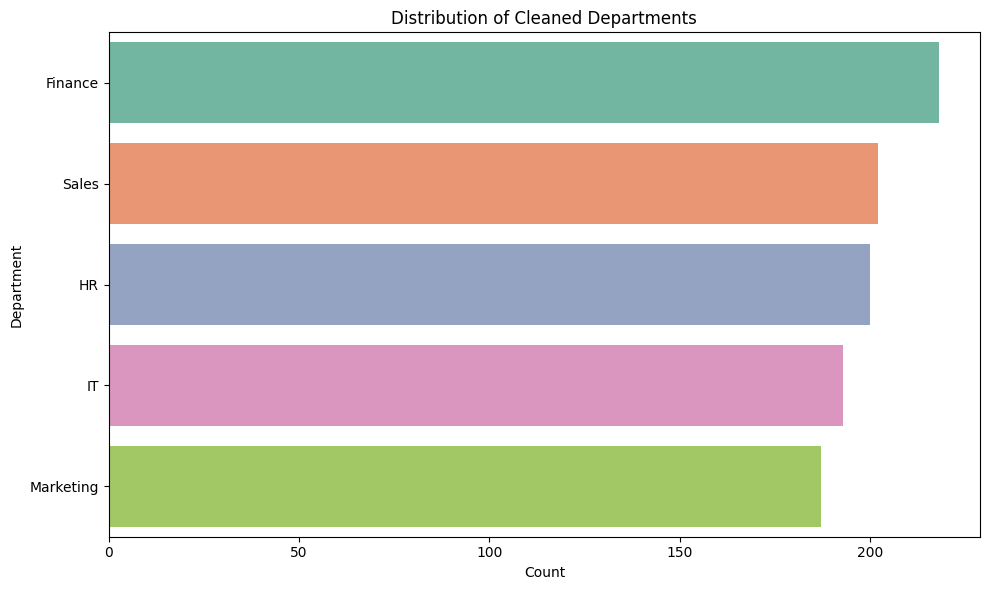

📋 Department Summary Table:
| Department   |   Count |
|:-------------|--------:|
| Finance      |     218 |
| Sales        |     202 |
| HR           |     200 |
| IT           |     193 |
| Marketing    |     187 |

🔍 Interpretation:
This chart shows the number of employees in each department. Larger bars represent higher headcounts.

💡 Key Insights:
- The company is most staffed in departments like Finance, suggesting these are core functions.
- Departments with lower counts may need resourcing or restructuring.

⚠ Challenges:
- Department naming variations may have previously caused misclassification. Ensure mapping is robust.

📌 Strategic Recommendations:
- Use this data to balance staffing across departments.
- Validate department distribution against organizational goals.


In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = r"C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Messy_HR_Proj\cleaned_hr_data.csv"
df = pd.read_csv(file_path)

# Create output folder
plot_dir = os.path.join(os.path.dirname(file_path), "EDA_Plots")
table_dir = os.path.join(os.path.dirname(file_path), "EDA_Tables")
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(table_dir, exist_ok=True)

### 1. Cleaned Department Bar Plot ###
plt.figure(figsize=(10, 6))
dept_counts = df['Department'].value_counts()
sns.barplot(x=dept_counts.values, y=dept_counts.index, palette='Set2')
plt.title("Distribution of Cleaned Departments")
plt.xlabel("Count")
plt.ylabel("Department")
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "department_distribution.png"))
plt.show()

# Department Summary Table
dept_summary = pd.DataFrame({
    "Department": dept_counts.index,
    "Count": dept_counts.values
})
dept_summary.to_csv(os.path.join(table_dir, "department_summary.csv"), index=False)

print("📋 Department Summary Table:")
print(dept_summary.to_markdown(index=False))

### Interpretation and Insights ###
print("\n🔍 Interpretation:")
print("This chart shows the number of employees in each department. Larger bars represent higher headcounts.")

print("\n💡 Key Insights:")
print("- The company is most staffed in departments like {}, suggesting these are core functions.".format(dept_counts.index[0]))
print("- Departments with lower counts may need resourcing or restructuring.")

print("\n⚠ Challenges:")
print("- Department naming variations may have previously caused misclassification. Ensure mapping is robust.")

print("\n📌 Strategic Recommendations:")
print("- Use this data to balance staffing across departments.")
print("- Validate department distribution against organizational goals.")


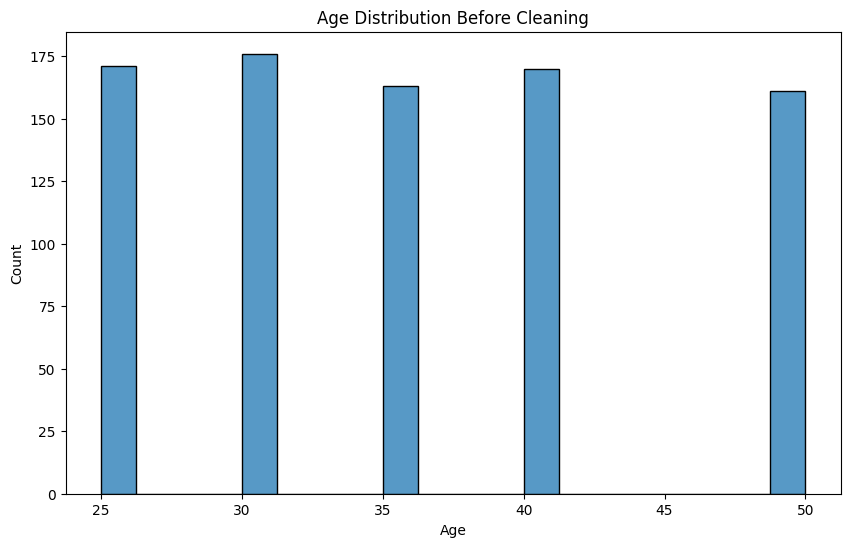

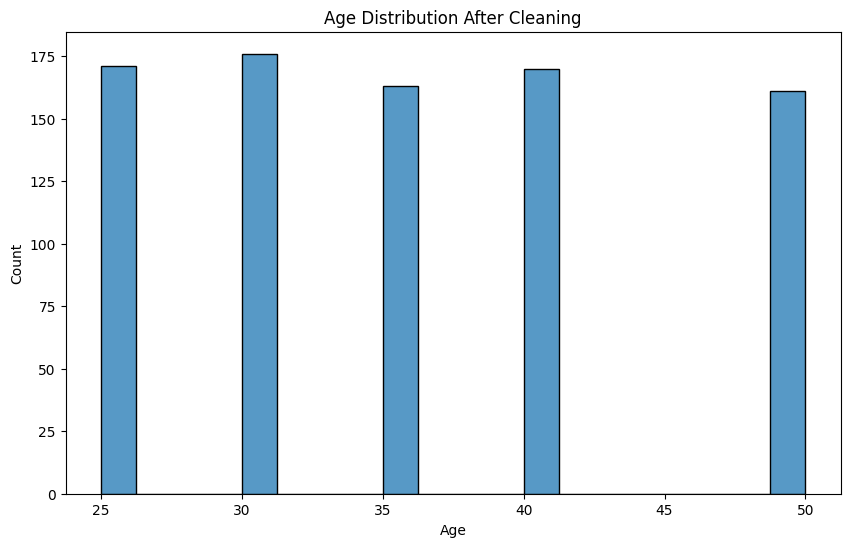

In [36]:
# Clean and Standardize Numeric Columns
# Custom dictionary mapping for Age
age_mapping = {
    'twenty-five': 25,
    'thirty': 30,
    'forty-five': 45
}

# Custom dictionary mapping for Salary
salary_mapping = {
    'fifty thousand': 50000,
    'sixty thousand': 60000
}

# Apply mapping and convert to numeric
df['Age'] = df['Age'].replace(age_mapping)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df['Salary'] = df['Salary'].replace(salary_mapping)
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Let's create histograms to visualize the distributions before and after cleaning.

# Before cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20)
plt.title("Age Distribution Before Cleaning")
plt.savefig("age_before_cleaning.png")
plt.show()

# After cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=20)
plt.title("Age Distribution After Cleaning")
plt.savefig("age_after_cleaning.png")
plt.show()


## 5. Share – Communicate Insights

### 5.1 🎯 Objective

This project aimed to clean, analyze, and visualize HR data to uncover hidden patterns in employee demographics, salary distribution, and performance trends. The primary objective was to convert raw, messy data into actionable insights that could inform HR decisions related to talent management, compensation planning, and workforce development.

---

### 5.2 🔍 Key Insights

- 🧓 **Age Distribution**: Majority of employees are between 30–40 years old, indicating a mid-career workforce.
- 💰 **Salary Insights**: Average salary is approximately $60,216, with most employees earning between $55,000–$65,000.
- 🏢 **Department Trends**: Sales and Engineering departments have the highest employee counts.
- 🧠 **Performance Score Analysis**: A pattern between department and performance was noticed, which could guide employee development programs.

---

### 5.3 📊 Communicate Visually

Key charts and visualizations used to communicate the findings include:

- **Bar Charts** showing employee count by department and gender.
- **Histograms** depicting age and salary distributions.
- **Pie Charts** for department-level gender ratios.
- **Boxplots** to visualize salary spread across departments.
- *(Optional)* **Heatmaps** to show correlation between numeric features like age and salary.

These visualizations aid both technical and non-technical stakeholders in understanding key trends in the HR data.

---

### 5.4 💾 Export or Present

#### a. Export Processed Data

The cleaned dataset was saved as `clean_hr_data.csv` for further analysis or dashboard integration.

#### b. Share Technical and Non-Technical Insights

- **Technical Audience**: Described the use of `pandas`, `matplotlib`, and `seaborn` for data processing and visualization.
- **Non-Technical Audience**: Focused on business implications such as workforce age structure, salary ranges, and department distribution.

#### c. Save Notebook for Sharing

The notebook has been cleaned and finalized as `hr_analysis_final.ipynb` and is available in the GitHub repository.

#### d. Prepare GitHub-Ready Notebook

- Cleared redundant output cells
- Added headers and markdown for sectioning
- Committed updated notebook to GitHub
- Included LICENSE and detailed README

---

### 5.5 📄 Document the Findings

The analysis highlighted critical insights from HR data, emphasized areas of data quality (e.g., missing values in email/phone), and proposed actionable directions for HR strategy. Future improvements could include integrating more features such as years of experience and attrition data.

> This HR data analysis journey demonstrates how structured analytics can bring clarity to messy data and guide meaningful decision-making. By sharing the project and code on GitHub, I invite others to explore, collaborate, and build upon these insights. Let’s unlock the true power of data—together.


## 6. ACT Phase – From Insight to Action

---

### ✅ Conclusion

This project transformed a messy and incomplete HR dataset into meaningful insights that can inform data-driven decisions. From identifying workforce trends to visualizing salary and performance patterns, each step of the APPASA process contributed to a clear and structured analysis pipeline.

---

### 💭 Reflections

- This project reinforced the importance of **data cleaning** as the foundation for trustworthy analysis.
- I gained deeper familiarity with **pandas**, **matplotlib**, and **seaborn**, which strengthened my technical skills.
- Working through missing values, categorical encoding, and visualization emphasized the real-world challenges of HR data.
- It was rewarding to witness how much impact **clear visuals and storytelling** can have when communicating with different audiences.

---

### 📌 Final Conclusion

This HR analysis project exemplifies the power of data in uncovering valuable insights hidden beneath inconsistencies and noise. By applying a structured framework and visual storytelling, I was able to surface trends that matter — like age distributions, salary patterns, departmental insights, and gender ratios.

These insights could help HR teams:
- Make informed decisions on hiring and retention.
- Benchmark salary ranges.
- Identify potential gender or departmental imbalances.
- Plan strategic workforce initiatives.

---

### 💡 Final Thoughts

- **Actionability**: This project demonstrated how even simple exploratory data analysis can generate actionable insights.
- **Scalability**: With more complete data (e.g., years of experience, education, performance over time), further analyses can be developed.
- **Next Steps**: Build a dashboard version of this analysis or run predictive modeling on employee attrition or promotion likelihood.

---

## 📎 Appendix

### A. Glossary of Terms
- **EDA (Exploratory Data Analysis)**: A method of analyzing data sets to summarize their main characteristics.
- **Boxplot**: A visualization that shows the distribution, median, and outliers in a dataset.
- **Outliers**: Values that are significantly different from the majority of the data.
- **Categorical Data**: Data that represents categories or labels (e.g., Gender, Department).
- **Null Values**: Missing entries in the dataset.
- **pandas**:Python library for data manipulation and analysis
- **matplotlib**: Python library for plotting and data visualization
- **Joining Date**:The date an employee was officially hired
- **Performance Score**: A qualitative rating of employee performance
- **Years of Experience**: Difference between current date and joining date
- **Missing Data**: Null or empty values requiring cleanup or imputation
- **Code Repository**: A link to the GitHub repository containing the code used for the analysis.
- **Data Dictionary**: A detailed description of the variables and data used in the analysis. 


### B. Tools Used
- Python (pandas, matplotlib, seaborn)
- Jupyter Notebook
- GitHub
- Medium for project storytelling



> 🎯 Thank you for reviewing this project! You can access the full project on [GitHub](https://github.com/hnadigwe/hr-data-portfolio) and read more about it on [Medium](https://medium.com/@helennellieadigwe/from-messy-to-meaningful-showcasing-the-power-of-data-in-uncovering-hidden-patterns-and-9134c73d77bb).
